# Zillow Real Estate Pricing (San Diego, CA)

# Introduction

A linear regression model as well as the Random Forest method will be used to compare the relationship between the features and the price. The columns in our data frame and listed below.

    - price of property
    - type of property
    - postalcode
    - city
    - url to listing
    - floorsize in sqft
    - number of bedrooms
    - number of bathrooms
    - agent/company selling the property
    - location: suburb or city

The city and suburbs scrapped in this project are:
    - San Diego and La Jolla (city)
    - Chula Vista, La Mesa, El Cajon, Carlsbad, Escondido, Oceanside, Encinitas, Cardiff, San Marcos, 
      Solana Beach', Del Mar, Coronado, Poway, Santee, Vista, and Spring Valley.
      
The definition of the type of homes are listed below: 
    - House
    - Condo
    - Townhouse 
    - Multi-Family (apartments)
    - Pre-foreclosure (30-120 grace period for current tenents to pay overdue balance)
    - Foreclosure (owners selling the mortgaged property to recover the amount owed)
    - Auction (owned by bank or agent)

The two methods used are OLS and Random Forest using RandomizedSearchCV. Ordinary Least Squares is a method that estimates the relationship between every variable with the independent variable. It minimizes the sum of the squares between the observed and predicited values often shown as a linear line. RandomizedSearchCV is an algorithm used to find the best combination of parameters in the model to increase teh accuracy of the random forest method in making predictions.

## Functions and Libraries

In [1]:
import requests
import json
import csv
from bs4 import BeautifulSoup
import time

In [2]:
class ZillowScraper():
    
    results = []
    #creating list of data scraped from ZillowScrapper.
    
    def __init__ (self, url, params, headers):
        self.url = url
        self.params = params
        self.headers = headers
    #initialize attributes of class
        
    def pull(self, url, params):  
        response = requests.get(url, headers=self.headers, params=params)
        #pull information to scrape
        return response
     
        
    def analyze(self, response):
        
        content = BeautifulSoup(response,'lxml')
        #use Beautiful Soup to parse webpage.
        resident_cards = content.find('ul',{'class': 'photo-cards photo-cards_wow photo-cards_short'})
        for card in resident_cards.contents:
            script =  card.find('script', {'type':'application/ld+json'})
            
            if script:
                json_script = json.loads(script.contents[0])
                self.results.append({
                    'price': card.find('div',{'class':'list-card-price'}).text,
                    'type': card.find('div',{'class':'list-card-type'}).text,
                    'postalcode': json_script['address']['postalCode'],
                    'city': json_script['address']['addressLocality'],
                    'url': json_script['url'],
                    'floorsize': json_script['floorSize']['value'],
                    'bedrooms': card.find_all('li')[0].text,
                    'bathrooms': card.find_all('li')[1].text,
                    'seller': card.find('div',{'class':'list-card-truncate'})
                    })
        #scraping specific property information from search page.        

                    
    def open_csv(self):
    
        with open('sandiego_zillow.csv','w') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=self.results[0].keys())
            writer.writeheader()
            
            for row in self.results:
                writer.writerow(row)
        #creating csv file. 
        
    def run(self,n):
               
        for page in range(1,n):

            res = self.pull(self.url, self.params)
            #pulling information
            self.analyze(res.text)
            #formatting information
            time.sleep(2)
            # 2 second time delay
        self.open_csv()   
        #running class through every page in search. 
    

## Scraping top San Diego City/Suburbs:

In [3]:
san_diego_url = 'https://www.zillow.com/homes/San-Diego,-CA_rb/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22San%20Diego%2C%20CA%22%2C%22mapBounds%22%3A%7B%22west%22%3A-117.96878306620977%2C%22east%22%3A-116.07364146464727%2C%22south%22%3A32.53452877593171%2C%22north%22%3A33.146047620910394%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A54296%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22manu%22%3A%7B%22value%22%3Afalse%7D%2C%22land%22%3A%7B%22value%22%3Afalse%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A9%7D'
san_diego_params = {'searchQueryState': '{"pagination":{"currentPage": %s}:"San Diego, CA","mapBounds":{"west":-117.49774424785039,"east":-116.54468028300664,"south":32.66757437532881,"north":33.01371776913924},"regionSelection":[{"regionId":54296,"regionType":6}],"isMapVisible":true,"filterState":{},"isListVisible":true}'}
san_diego_headers = {'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
                'accept-encoding': 'gzip, deflate, br',
                'accept-language': 'en-US,en;q=0.9',
                'cache-control': 'max-age=0',
                'cookie': 'zguid=23|%24bf6750d0-ffc4-4736-bc7c-737656f6257b; _ga=GA1.2.1587369970.1595271965; zjs_anonymous_id=%22bf6750d0-ffc4-4736-bc7c-737656f6257b%22; _pxvid=1053c55a-cabc-11ea-9cc4-0242ac120005; _gcl_au=1.1.944134186.1595271970; _fbp=fb.1.1595271970915.211190209; __gads=ID=e7ff6ce23c96776f:T=1595271971:S=ALNI_MY1JXF--UcnujtoZ-R53SS6jrBTJA; G_ENABLED_IDPS=google; zjs_user_id=%22X1-ZU12ozzrc6awumh_xpn1%22; OptanonConsent=isIABGlobal=false&datestamp=Mon Jul 20 2020 14:22:41 GMT-0500 (Central Daylight Time)&version=5.11.0&landingPath=NotLandingPage&groups=1%3A1%2C3%3A1%2C4%3A0; g_state={"i_p":1596095107745,"i_l":1}; userid=X|3|6f95515a87e0f877%7C5%7CabzX6KUnhr-u9h5VznTfYMD2lNbKaE0_W1xEnVG9dU0%3D; loginmemento=1|a29e259fbede38288d360dedb0645766d8d1d47f1f6e4366006988baa7d78157; ki_r=; optimizelyEndUserId=oeu1596088138433r0.5257272424942192; _pin_unauth=dWlkPU5qZzNNVGMyWm1ZdFpUUTJZaTAwWXpjd0xXRmhPV1V0WW1Kak1XRXdNakZsWW1NMSZycD1kSEoxWlE; ki_s=; zgsession=1|a6cb0293-619f-4881-b035-bbfb56f42169; KruxPixel=true; DoubleClickSession=true; KruxAddition=true; JSESSIONID=9D1E8FB0E97705D2BD01E93F00279956; ZILLOW_SID=1|AAAAAVVbFRIBVVsVEmmXstMaGWiied6mz220J%2BKfkPIImmw0tPVmDqCrXF4O%2Bk%2BmHiLQarmwkTlbt%2Fui0wsqo0MT9rMM; _gid=GA1.2.392708527.1597802195; _derived_epik=dj0yJnU9Q20tZlFlcUdnVWk4Y2hZZG83NzFYYnlPTkZUUnY1Nm4mbj1aVkQxX29UeUNRYjQyREdIcVBad0hBJm09NyZ0PUFBQUFBRjg4aHRj; _px3=d443be8b33272214a9d0d5e9d83d16e9184c6b01165dd354031ee05e5b424eab:4K7NoT3k3hdkjxZpClPQzJinV+uy97j0wctfHLO7G4d5eGZBbanA7nLK5Fh5OdUNJ6yuR/wH+c+NWtzDiInqsw==:1000:bLCztu3syHOoORmqu0976t2LNac2WsCrFVCVCTuoR6DOw2g8nqywpzTvuyRpunh5DRJOq4b9mut9WZb5ulOVfMIdTQIY6whdyJzeer41CWbNEkrzOTFoOTAWdHqcd8XQkUctCNyRJcACoqnMb/IUok4jcMDa9MiQWvmRi+wDbqQ=; intercom-session-xby8p85u=L1dPZDl0dUdGblpmMnovb0hyaUFlSEVEZWRxUmdtc1kzdnV5Q0RyeGpSYWIrWXRxd0w0UlQ5WUVyVVl4MFY1ai0tMUpqcHpyMFdnRzhscmluYjVYN3hxQT09--e5209d9540b33f016a0488c9b2eb8d829e4361a1; _uetsid=4776572acf731b04a40223ea1fd6f89f; _uetvid=c2047787b1af49647f427b434721efa6; _gat=1; ki_t=1596088052742%3B1597763731703%3B1597802794834%3B4%3B111; AWSALB=oOJqzKC5UYOGg4HKEeomCFPM24FL4KJonHAoOzl2mtEq3XzZYya0+1zfWPTASYXM1vNihaDPkxMOrQVKGL9+c+5AxcDoOOCZj12xBsyPI6uumIS0TWjZvdOXnGxe; AWSALBCORS=oOJqzKC5UYOGg4HKEeomCFPM24FL4KJonHAoOzl2mtEq3XzZYya0+1zfWPTASYXM1vNihaDPkxMOrQVKGL9+c+5AxcDoOOCZj12xBsyPI6uumIS0TWjZvdOXnGxe; search=6|1600394794987%7Crect%3D33.01371776913924%252C-116.54468028300664%252C32.66757437532881%252C-117.49774424785039%26rid%3D54296%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26sort%3Ddays%26z%3D0%26pt%3Dpmf%252Cpf%26fs%3D1%26fr%3D0%26mmm%3D1%26rs%3D0%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%09%0954296%09%09%09%09%09%09',
                'referer': 'https://www.zillow.com/homes/San-Diego,-CA_rb/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22San%20Diego%2C%20CA%22%2C%22mapBounds%22%3A%7B%22west%22%3A-118.04841296484373%2C%22east%22%3A-116.14228503515623%2C%22south%22%3A32.41986096386817%2C%22north%22%3A33.2276724215883%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A54296%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22fsba%22%3A%7B%22value%22%3Afalse%7D%2C%22fsbo%22%3A%7B%22value%22%3Afalse%7D%2C%22nc%22%3A%7B%22value%22%3Afalse%7D%2C%22fore%22%3A%7B%22value%22%3Afalse%7D%2C%22cmsn%22%3A%7B%22value%22%3Afalse%7D%2C%22auc%22%3A%7B%22value%22%3Afalse%7D%2C%22pmf%22%3A%7B%22value%22%3Afalse%7D%2C%22pf%22%3A%7B%22value%22%3Afalse%7D%2C%22fr%22%3A%7B%22value%22%3Atrue%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A9%7D',
                'sec-fetch-dest': 'document',
                'sec-fetch-mode': 'navigate',
                'sec-fetch-site': 'same-origin',
                'sec-fetch-user': '?1',
                'upgrade-insecure-requests': '1',
                'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.125 Safari/537.36'
              }
if __name__ == '__main__':
    sandiego = ZillowScraper(san_diego_url, san_diego_params, san_diego_headers)
    sandiego.run(21)

In [4]:
lajolla_url = 'https://www.zillow.com/homes/la-jolla,-CA_rb/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22la%20jolla%2C%20CA%22%2C%22mapBounds%22%3A%7B%22west%22%3A-117.31402417504884%2C%22east%22%3A-117.19557782495119%2C%22south%22%3A32.82885020178775%2C%22north%22%3A32.867067157909574%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A46087%2C%22regionType%22%3A8%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22sch%22%3A%7B%22value%22%3Atrue%7D%2C%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22manu%22%3A%7B%22value%22%3Afalse%7D%2C%22land%22%3A%7B%22value%22%3Afalse%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A13%7D'
lajolla_params = {
    'searchQueryState': '{"pagination":{},"usersSearchTerm":"la jolla, CA","mapBounds":{"west":-117.31402417504884,"east":-117.19557782495119,"south":32.82885020178775,"north":32.867067157909574},"regionSelection":[{"regionId":46087,"regionType":8}],"isMapVisible":true,"filterState":{"sch":{"value":true},"sort":{"value":"globalrelevanceex"},"manu":{"value":false},"land":{"value":false}},"isListVisible":true,"mapZoom":13}'
                    }
lajolla_headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'cookie': 'zguid=23|%24bf6750d0-ffc4-4736-bc7c-737656f6257b; _ga=GA1.2.1587369970.1595271965; zjs_anonymous_id=%22bf6750d0-ffc4-4736-bc7c-737656f6257b%22; _pxvid=1053c55a-cabc-11ea-9cc4-0242ac120005; _gcl_au=1.1.944134186.1595271970; _fbp=fb.1.1595271970915.211190209; __gads=ID=e7ff6ce23c96776f:T=1595271971:S=ALNI_MY1JXF--UcnujtoZ-R53SS6jrBTJA; G_ENABLED_IDPS=google; zjs_user_id=%22X1-ZU12ozzrc6awumh_xpn1%22; OptanonConsent=isIABGlobal=false&datestamp=Mon Jul 20 2020 14:22:41 GMT-0500 (Central Daylight Time)&version=5.11.0&landingPath=NotLandingPage&groups=1%3A1%2C3%3A1%2C4%3A0; g_state={"i_p":1596095107745,"i_l":1}; userid=X|3|6f95515a87e0f877%7C5%7CabzX6KUnhr-u9h5VznTfYMD2lNbKaE0_W1xEnVG9dU0%3D; loginmemento=1|a29e259fbede38288d360dedb0645766d8d1d47f1f6e4366006988baa7d78157; ki_r=; optimizelyEndUserId=oeu1596088138433r0.5257272424942192; _pin_unauth=dWlkPU5qZzNNVGMyWm1ZdFpUUTJZaTAwWXpjd0xXRmhPV1V0WW1Kak1XRXdNakZsWW1NMSZycD1kSEoxWlE; ki_s=; ki_t=1596088052742%3B1597949095124%3B1597951429554%3B5%3B224; zgsession=1|86604a77-c96d-4a8a-b78c-095b42efcd76; _gid=GA1.2.422558928.1598197444; DoubleClickSession=true; KruxPixel=true; KruxAddition=true; ZILLOW_SID=1|AAAAAVVbFRIBVVsVEqAJX2RdwVo6bgahT3PUL4CD4yApNEmKum1WrkrJMrOxq3DheYoJkPkRX4rFeZ2kSfuwn3aVerE5; _gat=1; JSESSIONID=BD9EF2A91C38DF63A6B3755D0FEACB0D; _pxff_cc=U2FtZVNpdGU9TGF4Ow==; _pxff_bsco=1; _derived_epik=dj0yJnU9LThxMkZmTm01RFhtQVpOOGhMbWhZV203cVIya0FtYy0mbj0tTFowUmplU283a2JvaXRheUp0Q1p3Jm09NyZ0PUFBQUFBRjlESnZj; _px3=c0994670efadfe3da35a3e101edc45e101d7da4dae07415bf958b0d20ed92520:Dah3e1RP3mmQtUXNu5yvg1+UQ+QzGBTb+1+VpTfRM8DKFHUOoxwCIq/O/vz43YoMlyzyk1X9OPTTuywCD2Ki9A==:1000:Y/uTux4+ePgNKLkoSfNflNhojuom9eg9Sv4EY59oLm5zgxyqX93lLTRLen/6/emwB4myWFgNkTrL24qurhbQlOwOMsixvmRUhIN6/04OQ6rjJjxBqvGcSx+RyuTyt/o2m8PUbO/PKcQIPER4vJNwGpQdBvVhiCFIJy1OW8Vq6xQ=; intercom-session-xby8p85u=cmZsN2pZR1JuS0RXS1VoNzlJYjVsTjIxYS9LbTZYNWJETDY3T09SVDlUZ3FtamoxcXg3RTUzTWtJZkJBbC9IWi0tc3ZVa2VwS2Mwc2JnNUVTZ3o2TDBxQT09--851ac557faad20a1a53ec4bf8011cff2e35a8dc8; _uetsid=12165f4709e6d8c837d063c0e3be9cca; _uetvid=c2047787b1af49647f427b434721efa6; AWSALB=QUl/1FXi7T/iEOGHXLalqs/ARLXC/c8UNgupDkIAEhoNkDqCj+XuXNG/AWerHZFUI0kOGm4+aPvhVksSDwGGX1VlWuJO8E5pM4onYGKXETM7Ncp69jlgAQRO7jK7; AWSALBCORS=QUl/1FXi7T/iEOGHXLalqs/ARLXC/c8UNgupDkIAEhoNkDqCj+XuXNG/AWerHZFUI0kOGm4+aPvhVksSDwGGX1VlWuJO8E5pM4onYGKXETM7Ncp69jlgAQRO7jK7; search=6|1600828432098%7Crect%3D32.867067157909574%252C-117.19557782495119%252C32.82885020178775%252C-117.31402417504884%26rid%3D46087%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26z%3D0%26sch%3Dprcemh1u%26type%3Dhouse%252Ccondo%252Capartment_duplex%252Ctownhouse%26pt%3Dpmf%252Cpf%26fs%3D1%26fr%3D0%26mmm%3D1%26rs%3D0%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%09%0946087%09%09%09%09%09%09',
    'referer': 'https://www.zillow.com/homes/la-jolla,-CA_rb/',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36'
                    }

if __name__ == '__main__':
    lajolla = ZillowScraper(lajolla_url, lajolla_params, lajolla_headers)
    lajolla.run(8)

In [5]:
chulavista_url = 'https://www.zillow.com/homes/Chula-Vista,-CA_rb/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22Chula%20Vista%2C%20CA%22%2C%22mapBounds%22%3A%7B%22west%22%3A-117.14297535009766%2C%22east%22%3A-116.90608264990234%2C%22south%22%3A32.59346421848647%2C%22north%22%3A32.67008377843765%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A51405%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22sch%22%3A%7B%22value%22%3Atrue%7D%2C%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A12%7D'
chulavista_params = {
        'searchQueryState': '{"pagination":{},"usersSearchTerm":"Chula Vista, CA","mapBounds":{"west":-117.14297535009766,"east":-116.90608264990234,"south":32.59346421848647,"north":32.67008377843765},"regionSelection":[{"regionId":51405,"regionType":6}],"isMapVisible":true,"filterState":{"sch":{"value":true},"sort":{"value":"globalrelevanceex"}},"isListVisible":true,"mapZoom":12}'
                    }
chulavista_headers = {
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
        'accept-encoding': 'gzip, deflate, br',
        'accept-language': 'en-US,en;q=0.9',
        'cache-control': 'max-age=0',
        'cookie': 'zguid=23|%24bf6750d0-ffc4-4736-bc7c-737656f6257b; _ga=GA1.2.1587369970.1595271965; zjs_anonymous_id=%22bf6750d0-ffc4-4736-bc7c-737656f6257b%22; _pxvid=1053c55a-cabc-11ea-9cc4-0242ac120005; _gcl_au=1.1.944134186.1595271970; _fbp=fb.1.1595271970915.211190209; __gads=ID=e7ff6ce23c96776f:T=1595271971:S=ALNI_MY1JXF--UcnujtoZ-R53SS6jrBTJA; G_ENABLED_IDPS=google; zjs_user_id=%22X1-ZU12ozzrc6awumh_xpn1%22; OptanonConsent=isIABGlobal=false&datestamp=Mon Jul 20 2020 14:22:41 GMT-0500 (Central Daylight Time)&version=5.11.0&landingPath=NotLandingPage&groups=1%3A1%2C3%3A1%2C4%3A0; g_state={"i_p":1596095107745,"i_l":1}; userid=X|3|6f95515a87e0f877%7C5%7CabzX6KUnhr-u9h5VznTfYMD2lNbKaE0_W1xEnVG9dU0%3D; loginmemento=1|a29e259fbede38288d360dedb0645766d8d1d47f1f6e4366006988baa7d78157; ki_r=; optimizelyEndUserId=oeu1596088138433r0.5257272424942192; _pin_unauth=dWlkPU5qZzNNVGMyWm1ZdFpUUTJZaTAwWXpjd0xXRmhPV1V0WW1Kak1XRXdNakZsWW1NMSZycD1kSEoxWlE; ki_s=; ki_t=1596088052742%3B1597949095124%3B1597951429554%3B5%3B224; zgsession=1|86604a77-c96d-4a8a-b78c-095b42efcd76; _gid=GA1.2.422558928.1598197444; DoubleClickSession=true; ZILLOW_SID=1|AAAAAVVbFRIBVVsVEmoVDil444xOoWriMVHhRnmZtTup%2BiaqpD90UpoS9nJtbLajmis2YvScdJMzJN%2FK2zAf8oFDCXMo; JSESSIONID=3CFED4545389AE56DDB19176989B1816; KruxPixel=true; KruxAddition=true; _derived_epik=dj0yJnU9V21iaEJ5ZkxBMFBFY3FfTzE1c1ozY2xIZkdrX19xeEQmbj1nSlJuZm5fVUlEWFdlcmM5anB2bXFnJm09NyZ0PUFBQUFBRjlDNktB; _gat=1; _pxff_cc=U2FtZVNpdGU9TGF4Ow==; _pxff_bsco=1; _px3=bdc7057e1f4f4687f992dba92a751634de7b914c02cb11554cf779524f53c915:JuC1ucon+WaUD6EnLaKGnRonxaHeNBOivYGbypqwZ/XPisZXPvw3AuUKD8Bs5UoeTRsop9oS5aQ4krnQ7Gh4gQ==:1000:Qx1QMh0Psym9qXowbpPlv0S87LUi7PVGWzmEoE5XNNjAd/4UybEMj4wdsEoLGxXoGf6V2QgxnXGA7i0gb6bcm3vyZ8I42p8VYCB3Yj1RzlO6yFyGwi7aYrwsoftvpoTGc3VXS+0UAhUbDsYa5omcHoRvygNErca2aOGgrvVog+w=; intercom-session-xby8p85u=Wk00MEhhaDBBRTcxbVpjTERJajVOeVg4amE4NnlpVnBYYVE2UUtFK1FaYlV6cW1SemZsT09oNVduYnppZE1RZi0teEgvdWNlV2F1VnlObUNtRWlZNUtVUT09--31eeeafafaede1a570ef927b08649ea62d7f64e5; _uetsid=12165f4709e6d8c837d063c0e3be9cca; _uetvid=c2047787b1af49647f427b434721efa6; AWSALB=FhDNcWc8hxtHDsdqb4jIfUZZKKNKhT9Uvu9UlaYDh3WaNj3Okeh7hDz7T5d8QGVZfH81SaPBv3KQSTpD71QTGfxCUQHu7exarDymES9u9VzrshS1wrjiDNDPIWhX; AWSALBCORS=FhDNcWc8hxtHDsdqb4jIfUZZKKNKhT9Uvu9UlaYDh3WaNj3Okeh7hDz7T5d8QGVZfH81SaPBv3KQSTpD71QTGfxCUQHu7exarDymES9u9VzrshS1wrjiDNDPIWhX; search=6|1600812635107%7Crect%3D32.67008377843765%252C-116.90608264990234%252C32.59346421848647%252C-117.14297535009766%26rid%3D51405%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26z%3D0%26sch%3Dprcemh1u%26pt%3Dpmf%252Cpf%26fs%3D1%26fr%3D0%26mmm%3D1%26rs%3D0%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%09%0951405%09%09%09%09%09%09',
        'referer': 'https://www.zillow.com/homes/Chula-Vista,-CA_rb/',
        'sec-fetch-dest': 'document',
        'sec-fetch-mode': 'navigate',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-user': '?1',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36'
                    }

if __name__ == '__main__':
    chulavista = ZillowScraper(chulavista_url, chulavista_params, chulavista_headers)
    chulavista.run(9)

In [6]:
lamesa_url = 'https://www.zillow.com/homes/La-Mesa,-CA_rb/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22La%20Mesa%2C%20CA%22%2C%22mapBounds%22%3A%7B%22west%22%3A-117.11242935009767%2C%22east%22%3A-116.87553664990236%2C%22south%22%3A32.72962949424513%2C%22north%22%3A32.806132295074505%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A46089%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22sch%22%3A%7B%22value%22%3Atrue%7D%2C%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A12%7D'
lamesa_params = {'searchQueryState': '{"pagination":{},"usersSearchTerm":"La Mesa, CA","mapBounds":{"west":-117.11242935009767,"east":-116.87553664990236,"south":32.72962949424513,"north":32.806132295074505},"regionSelection":[{"regionId":46089,"regionType":6}],"isMapVisible":true,"filterState":{"sch":{"value":true},"sort":{"value":"globalrelevanceex"}},"isListVisible":true,"mapZoom":12}'}
lamesa_headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'cookie': 'zguid=23|%24bf6750d0-ffc4-4736-bc7c-737656f6257b; _ga=GA1.2.1587369970.1595271965; zjs_anonymous_id=%22bf6750d0-ffc4-4736-bc7c-737656f6257b%22; _pxvid=1053c55a-cabc-11ea-9cc4-0242ac120005; _gcl_au=1.1.944134186.1595271970; _fbp=fb.1.1595271970915.211190209; __gads=ID=e7ff6ce23c96776f:T=1595271971:S=ALNI_MY1JXF--UcnujtoZ-R53SS6jrBTJA; G_ENABLED_IDPS=google; zjs_user_id=%22X1-ZU12ozzrc6awumh_xpn1%22; OptanonConsent=isIABGlobal=false&datestamp=Mon Jul 20 2020 14:22:41 GMT-0500 (Central Daylight Time)&version=5.11.0&landingPath=NotLandingPage&groups=1%3A1%2C3%3A1%2C4%3A0; g_state={"i_p":1596095107745,"i_l":1}; userid=X|3|6f95515a87e0f877%7C5%7CabzX6KUnhr-u9h5VznTfYMD2lNbKaE0_W1xEnVG9dU0%3D; loginmemento=1|a29e259fbede38288d360dedb0645766d8d1d47f1f6e4366006988baa7d78157; ki_r=; optimizelyEndUserId=oeu1596088138433r0.5257272424942192; _pin_unauth=dWlkPU5qZzNNVGMyWm1ZdFpUUTJZaTAwWXpjd0xXRmhPV1V0WW1Kak1XRXdNakZsWW1NMSZycD1kSEoxWlE; ki_s=; ki_t=1596088052742%3B1597949095124%3B1597951429554%3B5%3B224; zgsession=1|86604a77-c96d-4a8a-b78c-095b42efcd76; _gid=GA1.2.422558928.1598197444; DoubleClickSession=true; ZILLOW_SID=1|AAAAAVVbFRIBVVsVEmoVDil444xOoWriMVHhRnmZtTup%2BiaqpD90UpoS9nJtbLajmis2YvScdJMzJN%2FK2zAf8oFDCXMo; JSESSIONID=3CFED4545389AE56DDB19176989B1816; KruxPixel=true; KruxAddition=true; _gat=1; _pxff_cc=U2FtZVNpdGU9TGF4Ow==; _pxff_bsco=1; _derived_epik=dj0yJnU9cFZpbWtYMjJUQmZIRlF6TURpb2pzTU4zUEVRTElONUYmbj1YZWFlX2RYVnFVN3FOa0Q0ZWZvTjRRJm09NyZ0PUFBQUFBRjlDNzlR; _px3=dd510856a30ffe4f2f906f2fe8c9e3de0aec946a88e3685b69f027515cee9335:8hrxMCfdeyls5vfcPxFiUo8ePoHe15yGQIrrGKmwqliWlPlFb8VDE3dKj322LnFqIPuTKYk0YUHvaZbpesH5xg==:1000:fY4RBvP1jUCkF+XW0mfIvZx6NdIP8Mq35VV6Whrku9wu/5ypH2ln37Q+AeDis+MyPDm4ycw2YNwycO1F9yCxVrDNljCR+WnLcFuE6P2a+z/2JR8po6jKgm5yRMqpnpmcDuO0qT8QXnS8CTjNk/Z64lo05XeWmTukrq+rNIODwr8=; intercom-session-xby8p85u=MGJWdTU0TDJlR2N0ZGdGUzZYTHZxcWxhQVhsM1dxRU4ydDJRemN0eHJ1TTR1MHQrUGRURSszUnNHK05rT2pITi0tMzdKVWUwMFNtbThHZGJwRVpJSDdmdz09--d13189df1f2b9ae11f5bc50a186619727fc64250; _uetsid=12165f4709e6d8c837d063c0e3be9cca; _uetvid=c2047787b1af49647f427b434721efa6; AWSALB=Ex/ROIJL7p2MJA6DBQAv9MZbqa9rLoBh470ey4mGy53kTkGQUMmCZDFNkopttYN4J2T5aySBpgAAhkJtSJxpCxThoSYhZHRo5QNLWxsZMW8MJwUiBXpVnG2umxCb; AWSALBCORS=Ex/ROIJL7p2MJA6DBQAv9MZbqa9rLoBh470ey4mGy53kTkGQUMmCZDFNkopttYN4J2T5aySBpgAAhkJtSJxpCxThoSYhZHRo5QNLWxsZMW8MJwUiBXpVnG2umxCb; search=6|1600814302472%7Crect%3D32.806132295074505%252C-116.87553664990236%252C32.72962949424513%252C-117.11242935009767%26rid%3D46089%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26z%3D0%26sch%3Dprcemh1u%26pt%3Dpmf%252Cpf%26fs%3D1%26fr%3D0%26mmm%3D1%26rs%3D0%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%09%0946089%09%09%09%09%09%09',
    'referer': 'https://www.zillow.com/homes/Escondido,-CA_rb/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22Escondido%2C%20CA%22%2C%22mapBounds%22%3A%7B%22west%22%3A-117.51274940039063%2C%22east%22%3A-116.56517859960938%2C%22south%22%3A32.99677584858403%2C%22north%22%3A33.358839537831976%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A11337%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22sch%22%3A%7B%22value%22%3Atrue%7D%2C%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%7D%2C%22isListVisible%22%3Atrue%7D',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36'
                    }

if __name__ == '__main__':
    lamesa = ZillowScraper(lamesa_url,lamesa_params,lamesa_headers)
    lamesa.run(4)

In [7]:
elcajon_url = 'https://www.zillow.com/homes/El-Cajon,-CA_rb/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22El%20Cajon%2C%20CA%22%2C%22mapBounds%22%3A%7B%22west%22%3A-117.01434835009763%2C%22east%22%3A-116.77745564990232%2C%22south%22%3A32.77151445525491%2C%22north%22%3A32.84798125371526%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A38333%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22sch%22%3A%7B%22value%22%3Atrue%7D%2C%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A12%7D'
elcajon_params = {
    'searchQueryState': '{"pagination":{},"usersSearchTerm":"El Cajon, CA","mapBounds":{"west":-117.01434835009763,"east":-116.77745564990232,"south":32.77151445525491,"north":32.84798125371526},"regionSelection":[{"regionId":38333,"regionType":6}],"isMapVisible":true,"filterState":{"sch":{"value":true},"sort":{"value":"globalrelevanceex"}},"isListVisible":true,"mapZoom":12}'
                }
elcajon_headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'cookie': 'zguid=23|%24bf6750d0-ffc4-4736-bc7c-737656f6257b; _ga=GA1.2.1587369970.1595271965; zjs_anonymous_id=%22bf6750d0-ffc4-4736-bc7c-737656f6257b%22; _pxvid=1053c55a-cabc-11ea-9cc4-0242ac120005; _gcl_au=1.1.944134186.1595271970; _fbp=fb.1.1595271970915.211190209; __gads=ID=e7ff6ce23c96776f:T=1595271971:S=ALNI_MY1JXF--UcnujtoZ-R53SS6jrBTJA; G_ENABLED_IDPS=google; zjs_user_id=%22X1-ZU12ozzrc6awumh_xpn1%22; OptanonConsent=isIABGlobal=false&datestamp=Mon Jul 20 2020 14:22:41 GMT-0500 (Central Daylight Time)&version=5.11.0&landingPath=NotLandingPage&groups=1%3A1%2C3%3A1%2C4%3A0; g_state={"i_p":1596095107745,"i_l":1}; userid=X|3|6f95515a87e0f877%7C5%7CabzX6KUnhr-u9h5VznTfYMD2lNbKaE0_W1xEnVG9dU0%3D; loginmemento=1|a29e259fbede38288d360dedb0645766d8d1d47f1f6e4366006988baa7d78157; ki_r=; optimizelyEndUserId=oeu1596088138433r0.5257272424942192; _pin_unauth=dWlkPU5qZzNNVGMyWm1ZdFpUUTJZaTAwWXpjd0xXRmhPV1V0WW1Kak1XRXdNakZsWW1NMSZycD1kSEoxWlE; ki_s=; ki_t=1596088052742%3B1597949095124%3B1597951429554%3B5%3B224; zgsession=1|86604a77-c96d-4a8a-b78c-095b42efcd76; _gid=GA1.2.422558928.1598197444; DoubleClickSession=true; ZILLOW_SID=1|AAAAAVVbFRIBVVsVEmoVDil444xOoWriMVHhRnmZtTup%2BiaqpD90UpoS9nJtbLajmis2YvScdJMzJN%2FK2zAf8oFDCXMo; JSESSIONID=3CFED4545389AE56DDB19176989B1816; KruxPixel=true; KruxAddition=true; _derived_epik=dj0yJnU9YjVRMTRpb0JSYlpxQjNpUVE5Qm9zS1A4SGZoSGlpZGgmbj1lbTktcEFQUFBYZkRZSjAwZENoTXZBJm09NyZ0PUFBQUFBRjlDLWZJ; _gat=1; _pxff_cc=U2FtZVNpdGU9TGF4Ow==; _pxff_bsco=1; _px3=3d2421128708e90c4ad312b5bc7c1b430bc50d3cf07ee06e0305d089b4d447f5:ZLC14YV8SC+anaO1YRAskCWn9JNTz3HLEh5X4yBkmb4O2cI3qASRUElUzpyb5JbHf+TJAPi4+ramu800XOXTPQ==:1000:KvlW71KACBYgdYtIE8tDoZFu+mNqJEx3Q5tUE+QNYfj36FUPZwAkNLF7+xyJTClh9QMbL/dVSg27V2MlKMuCjKrNegP7VguZR7plrXkO+llgF05j2xeMoLRqGQYchhXntMf5MmlDtu1paOuRKXJlL4v5UyJ9VfS7HMH1KqE34U4=; intercom-session-xby8p85u=WkhIQk9CTzdYMndpdUJ0bUsyd1dPa2ZlTDBESUpVVFBhT0xpMlRtaDhidzM4QnBxUnpPVVIrVGpPNkZ4bGFFZC0tMUdaaVZGMzZhM0FBb0R3b3N3Q2ludz09--1564ad215ec7376d84aba1febf67d680b596a97a; _uetsid=12165f4709e6d8c837d063c0e3be9cca; _uetvid=c2047787b1af49647f427b434721efa6; AWSALB=HHbLgsrwuunD9m5iLeeV6Z1ybcFWLtOY/Kbt0d7Uc3iSq4FN+Km6u/jkweWYdehrmbt2AD26VjNvQE5qTkRWoOyg/vP++H0o4VbWcM3jSsxcU+H/UhNuEVcA0vYs; AWSALBCORS=HHbLgsrwuunD9m5iLeeV6Z1ybcFWLtOY/Kbt0d7Uc3iSq4FN+Km6u/jkweWYdehrmbt2AD26VjNvQE5qTkRWoOyg/vP++H0o4VbWcM3jSsxcU+H/UhNuEVcA0vYs; search=6|1600817011174%7Crect%3D32.84798125371526%252C-116.77745564990232%252C32.77151445525491%252C-117.01434835009763%26rid%3D38333%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26z%3D0%26sch%3Dprcemh1u%26pt%3Dpmf%252Cpf%26fs%3D1%26fr%3D0%26mmm%3D1%26rs%3D0%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%09%0938333%09%09%09%09%09%09',
    'referer': 'https://www.zillow.com/homes/El-Cajon,-CA_rb/',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36'
                    }

if __name__ == '__main__':
    elcajon = ZillowScraper(elcajon_url, elcajon_params,elcajon_headers)
    elcajon.run(8)

In [8]:
carlsbad_url = 'https://www.zillow.com/homes/Carlsbad,-CA_rb/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22Carlsbad%2C%20CA%22%2C%22mapBounds%22%3A%7B%22west%22%3A-117.39995085009765%2C%22east%22%3A-117.16305814990234%2C%22south%22%3A33.08372161714682%2C%22north%22%3A33.159918772259466%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A3975%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22sch%22%3A%7B%22value%22%3Atrue%7D%2C%22manu%22%3A%7B%22value%22%3Afalse%7D%2C%22land%22%3A%7B%22value%22%3Afalse%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A12%7D'
carlsbad_params = {
    'searchQueryState': '{"pagination":{},"usersSearchTerm":"Carlsbad, CA","mapBounds":{"west":-117.39995085009765,"east":-117.16305814990234,"south":33.08372161714682,"north":33.159918772259466},"regionSelection":[{"regionId":3975,"regionType":6}],"isMapVisible":true,"filterState":{"sch":{"value":true},"manu":{"value":false},"land":{"value":false}},"isListVisible":true,"mapZoom":12}'
                    }
carlsbad_headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'cookie': 'zguid=23|%24bf6750d0-ffc4-4736-bc7c-737656f6257b; _ga=GA1.2.1587369970.1595271965; zjs_anonymous_id=%22bf6750d0-ffc4-4736-bc7c-737656f6257b%22; _pxvid=1053c55a-cabc-11ea-9cc4-0242ac120005; _gcl_au=1.1.944134186.1595271970; _fbp=fb.1.1595271970915.211190209; __gads=ID=e7ff6ce23c96776f:T=1595271971:S=ALNI_MY1JXF--UcnujtoZ-R53SS6jrBTJA; G_ENABLED_IDPS=google; zjs_user_id=%22X1-ZU12ozzrc6awumh_xpn1%22; OptanonConsent=isIABGlobal=false&datestamp=Mon Jul 20 2020 14:22:41 GMT-0500 (Central Daylight Time)&version=5.11.0&landingPath=NotLandingPage&groups=1%3A1%2C3%3A1%2C4%3A0; g_state={"i_p":1596095107745,"i_l":1}; userid=X|3|6f95515a87e0f877%7C5%7CabzX6KUnhr-u9h5VznTfYMD2lNbKaE0_W1xEnVG9dU0%3D; loginmemento=1|a29e259fbede38288d360dedb0645766d8d1d47f1f6e4366006988baa7d78157; ki_r=; optimizelyEndUserId=oeu1596088138433r0.5257272424942192; _pin_unauth=dWlkPU5qZzNNVGMyWm1ZdFpUUTJZaTAwWXpjd0xXRmhPV1V0WW1Kak1XRXdNakZsWW1NMSZycD1kSEoxWlE; ki_s=; ki_t=1596088052742%3B1597949095124%3B1597951429554%3B5%3B224; zgsession=1|86604a77-c96d-4a8a-b78c-095b42efcd76; DoubleClickSession=true; KruxPixel=true; KruxAddition=true; _gid=GA1.2.612872810.1598407954; JSESSIONID=89B940B5E855310E6E0F52F0B99622DB; ZILLOW_SID=1|AAAAAVVbFRIBVVsVEtTcb3iksrkhx1yTFnFnp8o2IZp4XX0ywk1a4aJenH7ifsHeorNmdZcF4oRi2wxG3eH2OEFmUYmr; _derived_epik=dj0yJnU9MDMtdFlJV2haWE11YUM3emFTMV9KOHo4dUtDQjZORk8mbj1DOEo0TjQ4ZWsyUmRZZnprbjNELTJBJm09NyZ0PUFBQUFBRjlGOXFJ; _gat=1; _pxff_cc=U2FtZVNpdGU9TGF4Ow==; _pxff_bsco=1; _px3=45163a2f6217520769e17355705f65072a3adac621f6e906671fb1eb128236da:yUaqp95JauJATd35c5U8I0mACyuiD6X4COR9n7lmhfl/utfIlvsh9skudqjIgB+U+GmXlhe31RIYUfKAdvwgbw==:1000:Y4ZwpBfqScw9B2vSyNgi8bsOSgbke2mPaJBYeiJvPKgXStAfweY3ORM3f9rHmKyOhygRzL5/JXV56vMOdBM9YsSvXpaYsKZfRID4qPW7L4RpMKmGMTDEBTHzDZd+HfQ6+TwqQbSIJslCMpsGFzaT3agByvFky/Z4Nnv/LRaAiyU=; intercom-session-xby8p85u=cDdFeis3WnAvdDhObzdWeFBTbVE0YXFySENqMHJNSGZSL0R5dVBnbTBXaHkxdjdrY3R2eENrK2FrTzhPNGtVRS0tQW5DV2RlekQydFBiYksxTitCbkw2QT09--5ebd9c1ec18c532a9685f9ebb98dd95af2adf613; _uetsid=0d2e531968d37437d5cce675ebb2eb1c; _uetvid=c2047787b1af49647f427b434721efa6; AWSALB=UWz20lxLyFSlRRblRFEPVEtSQEyp9ZwiAzRcbPDksemjPxTaSKRP3mIJrBYYPSAJbq5Sg1BP7JFjUsWhAg1rmH6hcFVW4KiQz9r2F7fDnh9qwWUXVujXrmIz3adG; AWSALBCORS=UWz20lxLyFSlRRblRFEPVEtSQEyp9ZwiAzRcbPDksemjPxTaSKRP3mIJrBYYPSAJbq5Sg1BP7JFjUsWhAg1rmH6hcFVW4KiQz9r2F7fDnh9qwWUXVujXrmIz3adG; search=6|1601013907419%7Crect%3D33.159918772259466%252C-117.16305814990234%252C33.08372161714682%252C-117.39995085009765%26rid%3D3975%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26sort%3Ddays%26z%3D0%26sch%3Dprcemh1u%26type%3Dhouse%252Ccondo%252Capartment_duplex%252Ctownhouse%26pt%3Dpmf%252Cpf%26fs%3D1%26fr%3D0%26mmm%3D1%26rs%3D0%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%09%093975%09%09%09%09%09%09',
    'referer': 'https://www.zillow.com/homes/Carlsbad,-CA_rb/',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36'
                    }

if __name__ == '__main__':
    carlsbad = ZillowScraper(carlsbad_url,carlsbad_params,carlsbad_headers)
    carlsbad.run(7)

In [9]:
escondido_url = 'https://www.zillow.com/homes/Escondido,-CA_rb/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22Escondido%2C%20CA%22%2C%22mapBounds%22%3A%7B%22west%22%3A-117.27585670019532%2C%22east%22%3A-116.8020712998047%2C%22south%22%3A33.10181322478786%2C%22north%22%3A33.25410997538318%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A11337%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22sch%22%3A%7B%22value%22%3Atrue%7D%2C%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22manu%22%3A%7B%22value%22%3Afalse%7D%2C%22land%22%3A%7B%22value%22%3Afalse%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A11%7D'
escondido_params = {
    'searchQueryState': '{"pagination":{},"usersSearchTerm":"Escondido, CA","mapBounds":{"west":-117.51274940039063,"east":-116.56517859960938,"south":33.0255656707587,"north":33.33015901794086},"regionSelection":[{"regionId":11337,"regionType":6}],"isMapVisible":true,"filterState":{"sch":{"value":true},"sort":{"value":"globalrelevanceex"}},"isListVisible":true}'
} 
escondido_headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'cookie': 'zguid=23|%24bf6750d0-ffc4-4736-bc7c-737656f6257b; _ga=GA1.2.1587369970.1595271965; zjs_anonymous_id=%22bf6750d0-ffc4-4736-bc7c-737656f6257b%22; _pxvid=1053c55a-cabc-11ea-9cc4-0242ac120005; _gcl_au=1.1.944134186.1595271970; _fbp=fb.1.1595271970915.211190209; __gads=ID=e7ff6ce23c96776f:T=1595271971:S=ALNI_MY1JXF--UcnujtoZ-R53SS6jrBTJA; G_ENABLED_IDPS=google; zjs_user_id=%22X1-ZU12ozzrc6awumh_xpn1%22; OptanonConsent=isIABGlobal=false&datestamp=Mon Jul 20 2020 14:22:41 GMT-0500 (Central Daylight Time)&version=5.11.0&landingPath=NotLandingPage&groups=1%3A1%2C3%3A1%2C4%3A0; g_state={"i_p":1596095107745,"i_l":1}; userid=X|3|6f95515a87e0f877%7C5%7CabzX6KUnhr-u9h5VznTfYMD2lNbKaE0_W1xEnVG9dU0%3D; loginmemento=1|a29e259fbede38288d360dedb0645766d8d1d47f1f6e4366006988baa7d78157; ki_r=; optimizelyEndUserId=oeu1596088138433r0.5257272424942192; _pin_unauth=dWlkPU5qZzNNVGMyWm1ZdFpUUTJZaTAwWXpjd0xXRmhPV1V0WW1Kak1XRXdNakZsWW1NMSZycD1kSEoxWlE; ki_s=; ki_t=1596088052742%3B1597949095124%3B1597951429554%3B5%3B224; zgsession=1|86604a77-c96d-4a8a-b78c-095b42efcd76; _gid=GA1.2.422558928.1598197444; DoubleClickSession=true; ZILLOW_SID=1|AAAAAVVbFRIBVVsVEmoVDil444xOoWriMVHhRnmZtTup%2BiaqpD90UpoS9nJtbLajmis2YvScdJMzJN%2FK2zAf8oFDCXMo; JSESSIONID=3CFED4545389AE56DDB19176989B1816; KruxPixel=true; KruxAddition=true; _derived_epik=dj0yJnU9V21iaEJ5ZkxBMFBFY3FfTzE1c1ozY2xIZkdrX19xeEQmbj1nSlJuZm5fVUlEWFdlcmM5anB2bXFnJm09NyZ0PUFBQUFBRjlDNktB; _pxff_tm=1; _px3=dcd75056dbf9f561e239b35cd1220160fc282537c47cfc8b2f1af1775c591b6e:+4TvqdKBusabF4mlWbIZgxjgOmhUMzAUVgbXKk9NQC+xl/UbpszhqPfcVvkj4Uy8DXEnOHiS83orpPkgKVQl2w==:1000:pJp+UY3z5FoAocoC1nq0lvw1anuSi7dKoX6v9f44R42OKWAve0sIXqWbQZBCzZUlOAbOe6tqTSnQgjoB1aBwA9qUJ9B9hCr0T7Xr8Z394P7y2BD8yhJjvI25R0CM6uRwcgUWccAhHiq3/kGJqcb00bqKwpIgHPHS5Vi63T8iLHg=; _uetsid=12165f4709e6d8c837d063c0e3be9cca; _uetvid=c2047787b1af49647f427b434721efa6; intercom-session-xby8p85u=UjV3TkNNYi9XWTZEdGl4RTkvcWZHM0I5T2s1Y1dJc0lxNEVNNHJneUk2Q2tidTJzclRTZTBDckFnOXUraEx2Qy0tQ3JjbGxLWmF2andDc1JWZlY5SEVmQT09--f1af0facef2b02fe8efc8bfd3b9448e57375b7ec; AWSALB=EUBOhfIXVhnrLpZkrZZHdOOYhjjyZnGmU0Xwl66CQOX5vA54p/Xs1TqDsFt91zEZn77ObMf1/+IoR5gxa3D6g8+ux8d/sYaa2HYeKs80o65Fa/48pLKmNxQo/4/N; AWSALBCORS=EUBOhfIXVhnrLpZkrZZHdOOYhjjyZnGmU0Xwl66CQOX5vA54p/Xs1TqDsFt91zEZn77ObMf1/+IoR5gxa3D6g8+ux8d/sYaa2HYeKs80o65Fa/48pLKmNxQo/4/N; search=6|1600813122433%7Crect%3D33.33015901794086%252C-116.56517859960938%252C33.0255656707587%252C-117.51274940039063%26rid%3D11337%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26z%3D0%26sch%3Dprcemh1u%26pt%3Dpmf%252Cpf%26fs%3D1%26fr%3D0%26mmm%3D1%26rs%3D0%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%09%0911337%09%09%09%09%09%09; _gat=1',
    'referer': 'https://www.zillow.com/homes/Escondido,-CA_rb/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22Escondido%2C%20CA%22%2C%22mapBounds%22%3A%7B%22west%22%3A-117.51274940039063%2C%22east%22%3A-116.56517859960938%2C%22south%22%3A32.81460699597056%2C%22north%22%3A33.53988170159496%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A11337%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22sch%22%3A%7B%22value%22%3Atrue%7D%2C%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%7D%2C%22isListVisible%22%3Atrue%7D',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36'
                    }

if __name__ == '__main__':
    escondido = ZillowScraper(escondido_url,escondido_params,escondido_headers)
    escondido.run(7)

In [10]:
oceanside_url = 'https://www.zillow.com/homes/Oceanside,-CA_rb/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22Oceanside%2C%20CA%22%2C%22mapBounds%22%3A%7B%22west%22%3A-118.36493880078126%2C%22east%22%3A-116.46979719921876%2C%22south%22%3A33.023607227575525%2C%22north%22%3A33.63174637667549%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A6285%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22sch%22%3A%7B%22value%22%3Atrue%7D%2C%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22manu%22%3A%7B%22value%22%3Afalse%7D%2C%22land%22%3A%7B%22value%22%3Afalse%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A9%7D'
oceanside_params = {'searchQueryState': '{"pagination":{},"usersSearchTerm":"Oceanside, CA","mapBounds":{"west":-117.65426070019532,"east":-117.1804752998047,"south":33.25215662572245,"north":33.4041917927507},"regionSelection":[{"regionId":6285,"regionType":6}],"isMapVisible":true,"filterState":{"sch":{"value":true},"sort":{"value":"globalrelevanceex"}},"isListVisible":true,"mapZoom":11}'}
oceanside_headers = {'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
                    'accept-encoding': 'gzip, deflate, br',
                    'accept-language': 'en-US,en;q=0.9',
                    'cache-control': 'max-age=0',
                    'cookie': 'zguid=23|%24bf6750d0-ffc4-4736-bc7c-737656f6257b; _ga=GA1.2.1587369970.1595271965; zjs_anonymous_id=%22bf6750d0-ffc4-4736-bc7c-737656f6257b%22; _pxvid=1053c55a-cabc-11ea-9cc4-0242ac120005; _gcl_au=1.1.944134186.1595271970; _fbp=fb.1.1595271970915.211190209; __gads=ID=e7ff6ce23c96776f:T=1595271971:S=ALNI_MY1JXF--UcnujtoZ-R53SS6jrBTJA; G_ENABLED_IDPS=google; zjs_user_id=%22X1-ZU12ozzrc6awumh_xpn1%22; OptanonConsent=isIABGlobal=false&datestamp=Mon Jul 20 2020 14:22:41 GMT-0500 (Central Daylight Time)&version=5.11.0&landingPath=NotLandingPage&groups=1%3A1%2C3%3A1%2C4%3A0; g_state={"i_p":1596095107745,"i_l":1}; userid=X|3|6f95515a87e0f877%7C5%7CabzX6KUnhr-u9h5VznTfYMD2lNbKaE0_W1xEnVG9dU0%3D; loginmemento=1|a29e259fbede38288d360dedb0645766d8d1d47f1f6e4366006988baa7d78157; ki_r=; optimizelyEndUserId=oeu1596088138433r0.5257272424942192; _pin_unauth=dWlkPU5qZzNNVGMyWm1ZdFpUUTJZaTAwWXpjd0xXRmhPV1V0WW1Kak1XRXdNakZsWW1NMSZycD1kSEoxWlE; ki_s=; ki_t=1596088052742%3B1597949095124%3B1597951429554%3B5%3B224; zgsession=1|86604a77-c96d-4a8a-b78c-095b42efcd76; _gid=GA1.2.422558928.1598197444; DoubleClickSession=true; ZILLOW_SID=1|AAAAAVVbFRIBVVsVEmoVDil444xOoWriMVHhRnmZtTup%2BiaqpD90UpoS9nJtbLajmis2YvScdJMzJN%2FK2zAf8oFDCXMo; JSESSIONID=3CFED4545389AE56DDB19176989B1816; KruxPixel=true; _derived_epik=dj0yJnU9UWxZOXFYNm4zNkJ4UE95T28xQXFVeXlSdlNpdWstTm8mbj1fRmVpakRjSUo0bUc5dlR0SlcwRFNnJm09NyZ0PUFBQUFBRjlDM21F; KruxAddition=true; _gat=1; _pxff_cc=U2FtZVNpdGU9TGF4Ow==; _pxff_bsco=1; _px3=6de23c6f4b310ad654679ffc11f3130ccc4b8aff3664a96b8b574a408a2871df:2AaLwE+EOJEo5Efa9iV0Q39GT2a2PZf/G3qcDyPsvR7y8a5/uCpIL1PsaLtyOvXwhAlwMWH23ynvQGCipZvnNA==:1000:e2D4rk6dvINd9vzwA5cVwTIgUcFDvatjAZO42QxrDUyBPhcsDlLSn2tQShPqIQBbx0d4/ccbpFgALCFymTso2qpbe4mme8fFq+jdErZ42vy86suFZbU+r+Ksvy6DKHDk0LLCM/6S3O7GepunTrPzP6C6rB8xdvv7tbcWmJDthoI=; intercom-session-xby8p85u=dHZBS3cwUU9iR0lTOEl4dVFPTjY1Sld2VUZYNzcyVXY0YThoTWRHMmdQVHNqSU95VHRQVmFxZTV0OWlIYTFhTy0tUVlOTHN2OERrM2RQMSthWnY3eWRTdz09--c085ca368f0cf1c92cd0fb78e7c54cab735ca39c; _uetsid=12165f4709e6d8c837d063c0e3be9cca; _uetvid=c2047787b1af49647f427b434721efa6; AWSALB=9Jiy6UtmIc9YdBXs1K/SHNXgbXYIBGhGnaz/LghsGpnRVpo0VZqLJZJGJGTP18U0lFha3bLxBKcZBDgv6Y9/yqIjBwly7gVucNIREvKr5QG6DE+s0DTHfBHx98wB; AWSALBCORS=9Jiy6UtmIc9YdBXs1K/SHNXgbXYIBGhGnaz/LghsGpnRVpo0VZqLJZJGJGTP18U0lFha3bLxBKcZBDgv6Y9/yqIjBwly7gVucNIREvKr5QG6DE+s0DTHfBHx98wB; search=6|1600811038773%7Crect%3D33.4041917927507%252C-117.1804752998047%252C33.25215662572245%252C-117.65426070019532%26rid%3D6285%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26z%3D0%26sch%3Dprcemh1u%26pt%3Dpmf%252Cpf%26fs%3D1%26fr%3D0%26mmm%3D1%26rs%3D0%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%09%096285%09%09%09%09%09%09',
                    'referer': 'https://www.zillow.com/homes/Oceanside,-CA_rb/',
                    'sec-fetch-dest': 'document',
                    'sec-fetch-mode': 'navigate',
                    'sec-fetch-site': 'same-origin',
                    'sec-fetch-user': '?1',
                    'upgrade-insecure-requests': '1',
                    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36'
                    }

if __name__ == '__main__':
    oceanside = ZillowScraper(oceanside_url,oceanside_params,oceanside_headers)
    oceanside.run(9)

In [11]:
encinitas_url = 'https://www.zillow.com/homes/Encinitas,-CA_rb/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22Encinitas%2C%20CA%22%2C%22mapBounds%22%3A%7B%22west%22%3A-117.37194085009766%2C%22east%22%3A-117.13504814990235%2C%22south%22%3A33.01150362015394%2C%22north%22%3A33.08776334881521%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A45164%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22sch%22%3A%7B%22value%22%3Atrue%7D%2C%22manu%22%3A%7B%22value%22%3Afalse%7D%2C%22land%22%3A%7B%22value%22%3Afalse%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A12%7D'
encinitas_params = {
    'searchQueryState': '{"pagination":{},"usersSearchTerm":"Encinitas, CA","mapBounds":{"west":-117.37194085009766,"east":-117.13504814990235,"south":33.01150362015394,"north":33.08776334881521},"regionSelection":[{"regionId":45164,"regionType":6}],"isMapVisible":true,"filterState":{"sch":{"value":true},"manu":{"value":false},"land":{"value":false}},"isListVisible":true,"mapZoom":12}'
                    }
encinitas_headers = {
                    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
                    'accept-encoding': 'gzip, deflate, br',
                    'accept-language': 'en-US,en;q=0.9',
                    'cache-control': 'max-age=0',
                    'cookie': 'zguid=23|%24bf6750d0-ffc4-4736-bc7c-737656f6257b; _ga=GA1.2.1587369970.1595271965; zjs_anonymous_id=%22bf6750d0-ffc4-4736-bc7c-737656f6257b%22; _pxvid=1053c55a-cabc-11ea-9cc4-0242ac120005; _gcl_au=1.1.944134186.1595271970; _fbp=fb.1.1595271970915.211190209; __gads=ID=e7ff6ce23c96776f:T=1595271971:S=ALNI_MY1JXF--UcnujtoZ-R53SS6jrBTJA; G_ENABLED_IDPS=google; zjs_user_id=%22X1-ZU12ozzrc6awumh_xpn1%22; OptanonConsent=isIABGlobal=false&datestamp=Mon Jul 20 2020 14:22:41 GMT-0500 (Central Daylight Time)&version=5.11.0&landingPath=NotLandingPage&groups=1%3A1%2C3%3A1%2C4%3A0; g_state={"i_p":1596095107745,"i_l":1}; userid=X|3|6f95515a87e0f877%7C5%7CabzX6KUnhr-u9h5VznTfYMD2lNbKaE0_W1xEnVG9dU0%3D; loginmemento=1|a29e259fbede38288d360dedb0645766d8d1d47f1f6e4366006988baa7d78157; ki_r=; optimizelyEndUserId=oeu1596088138433r0.5257272424942192; _pin_unauth=dWlkPU5qZzNNVGMyWm1ZdFpUUTJZaTAwWXpjd0xXRmhPV1V0WW1Kak1XRXdNakZsWW1NMSZycD1kSEoxWlE; ki_s=; ki_t=1596088052742%3B1597949095124%3B1597951429554%3B5%3B224; zgsession=1|86604a77-c96d-4a8a-b78c-095b42efcd76; DoubleClickSession=true; KruxPixel=true; KruxAddition=true; _gid=GA1.2.612872810.1598407954; JSESSIONID=89B940B5E855310E6E0F52F0B99622DB; ZILLOW_SID=1|AAAAAVVbFRIBVVsVEtTcb3iksrkhx1yTFnFnp8o2IZp4XX0ywk1a4aJenH7ifsHeorNmdZcF4oRi2wxG3eH2OEFmUYmr; _derived_epik=dj0yJnU9MDMtdFlJV2haWE11YUM3emFTMV9KOHo4dUtDQjZORk8mbj1DOEo0TjQ4ZWsyUmRZZnprbjNELTJBJm09NyZ0PUFBQUFBRjlGOXFJ; _gat=1; _pxff_cc=U2FtZVNpdGU9TGF4Ow==; _pxff_bsco=1; _px3=630bf8c71b4898e81db20432e92eae84a473e38156f4a2bc518d3b349c306a7a:UmgL6SdkDzGH3TLKiS9uANxZu6TrSZinj4id9IYplsgAgFeOsLkqlyM79Pd2wV3EVr1XCXJ7B+BYdnNZThmhsA==:1000:0URPz0JeKaD7gg8p6uzQHbbjbupyTlpdHwfiHJI0CYX8XXMEwv6nYYiY8lr8AhJ9FyIHlt8YJ1Bo3l7neSJzNRqritr65hIfprwTUsWLLypSYmvTph8IaVylA98RaT7ceFJ62ssHW9XqYBc3XCPDMXLzfyp6PuHXESc8xzsf3O4=; intercom-session-xby8p85u=WmsvVDFXNkhPVXJLVm9FVTF3RjJONUhsc3NqeEYvN1ZVSUFHQ2UyK1NXYm1jbGVqemYvU3A0Rkc3MmUwdk9hVi0tbFhIYXRjWVVpQmcvOVNvV0E0SWk1dz09--f823c7997dba353486cf0a29637a7605309860b9; _uetsid=0d2e531968d37437d5cce675ebb2eb1c; _uetvid=c2047787b1af49647f427b434721efa6; AWSALB=4vsICRcAJmnZNOoNymP816jjVxJ+gYsrgGRyDE2eo2P6vXyAls9Lk/5ccZiPrSmHvNsdLWf67Rq17Q7XJv9oNiK2dYoUhcrJVKrVkgfV2WDjomuUyZhLnmjsvS6S; AWSALBCORS=4vsICRcAJmnZNOoNymP816jjVxJ+gYsrgGRyDE2eo2P6vXyAls9Lk/5ccZiPrSmHvNsdLWf67Rq17Q7XJv9oNiK2dYoUhcrJVKrVkgfV2WDjomuUyZhLnmjsvS6S; search=6|1601013598717%7Crect%3D33.08776334881521%252C-117.13504814990235%252C33.01150362015394%252C-117.37194085009766%26rid%3D45164%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26sort%3Ddays%26z%3D0%26sch%3Dprcemh1u%26type%3Dhouse%252Ccondo%252Capartment_duplex%252Ctownhouse%26pt%3Dpmf%252Cpf%26fs%3D1%26fr%3D0%26mmm%3D1%26rs%3D0%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%09%0945164%09%09%09%09%09%09',
                    'referer': 'https://www.zillow.com/homes/Encinitas,-CA_rb/',
                    'sec-fetch-dest': 'document',
                    'sec-fetch-mode': 'navigate',
                    'sec-fetch-site': 'same-origin',
                    'sec-fetch-user': '?1',
                    'upgrade-insecure-requests': '1',
                    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36'
                    }

if __name__ == '__main__':
    encinitas = ZillowScraper(encinitas_url, encinitas_params, encinitas_headers)
    encinitas.run(5)

In [12]:
sanmarcos_url = 'https://www.zillow.com/homes/San-Marcos,-CA_rb/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22San%20Marcos%2C%20CA%22%2C%22mapBounds%22%3A%7B%22west%22%3A-117.28933135009765%2C%22east%22%3A-117.05243864990234%2C%22south%22%3A33.1214026985497%2C%22north%22%3A33.197567156747546%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A40737%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22sch%22%3A%7B%22value%22%3Atrue%7D%2C%22manu%22%3A%7B%22value%22%3Afalse%7D%2C%22land%22%3A%7B%22value%22%3Afalse%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A12%7D'
sanmarcos_params = {
    'searchQueryState': '{"pagination":{},"usersSearchTerm":"San Marcos, CA","mapBounds":{"west":-117.28933135009765,"east":-117.05243864990234,"south":33.1214026985497,"north":33.197567156747546},"regionSelection":[{"regionId":40737,"regionType":6}],"isMapVisible":true,"filterState":{"sch":{"value":true},"manu":{"value":false},"land":{"value":false}},"isListVisible":true,"mapZoom":12}'
                    }
sanmarcos_headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'cookie': 'zguid=23|%24bf6750d0-ffc4-4736-bc7c-737656f6257b; _ga=GA1.2.1587369970.1595271965; zjs_anonymous_id=%22bf6750d0-ffc4-4736-bc7c-737656f6257b%22; _pxvid=1053c55a-cabc-11ea-9cc4-0242ac120005; _gcl_au=1.1.944134186.1595271970; _fbp=fb.1.1595271970915.211190209; __gads=ID=e7ff6ce23c96776f:T=1595271971:S=ALNI_MY1JXF--UcnujtoZ-R53SS6jrBTJA; G_ENABLED_IDPS=google; zjs_user_id=%22X1-ZU12ozzrc6awumh_xpn1%22; OptanonConsent=isIABGlobal=false&datestamp=Mon Jul 20 2020 14:22:41 GMT-0500 (Central Daylight Time)&version=5.11.0&landingPath=NotLandingPage&groups=1%3A1%2C3%3A1%2C4%3A0; g_state={"i_p":1596095107745,"i_l":1}; userid=X|3|6f95515a87e0f877%7C5%7CabzX6KUnhr-u9h5VznTfYMD2lNbKaE0_W1xEnVG9dU0%3D; loginmemento=1|a29e259fbede38288d360dedb0645766d8d1d47f1f6e4366006988baa7d78157; ki_r=; optimizelyEndUserId=oeu1596088138433r0.5257272424942192; _pin_unauth=dWlkPU5qZzNNVGMyWm1ZdFpUUTJZaTAwWXpjd0xXRmhPV1V0WW1Kak1XRXdNakZsWW1NMSZycD1kSEoxWlE; ki_s=; ki_t=1596088052742%3B1597949095124%3B1597951429554%3B5%3B224; zgsession=1|86604a77-c96d-4a8a-b78c-095b42efcd76; DoubleClickSession=true; KruxPixel=true; KruxAddition=true; _gid=GA1.2.612872810.1598407954; JSESSIONID=89B940B5E855310E6E0F52F0B99622DB; ZILLOW_SID=1|AAAAAVVbFRIBVVsVEtTcb3iksrkhx1yTFnFnp8o2IZp4XX0ywk1a4aJenH7ifsHeorNmdZcF4oRi2wxG3eH2OEFmUYmr; _derived_epik=dj0yJnU9MDMtdFlJV2haWE11YUM3emFTMV9KOHo4dUtDQjZORk8mbj1DOEo0TjQ4ZWsyUmRZZnprbjNELTJBJm09NyZ0PUFBQUFBRjlGOXFJ; _gat=1; _pxff_cc=U2FtZVNpdGU9TGF4Ow==; _pxff_bsco=1; _px3=7170651eb13a862800f3ad579a0d37e10b3072b6a4f04d0f5b46fe3fbcec638a:l70r51Hu2PrGPJEZxqiSvm1hDBCQN3+DRTkOjNwVWSkUE79U5j6nqmOFcx12Ee8zJjFfcEXrwFsgVZ3uzL1ugQ==:1000:UzrqbkWHKFTmT7JEkofsDOxufWL5MhAMehRQh7GcUfVmAmKBQDaYAjUb8tDfErOO/GlHr3KZ89IvhGoOz26HZxWnWMeZYxjXL9gDiIzT7KMy7UYNaORgbA7mjMLobkQk2jxzmTfqBZVv0GwmfbEdAISHWQTMJ8NBeOH/jDCXT/E=; intercom-session-xby8p85u=NFdjTDBBTnFUcmRoZjdicGRNOE43ZHpRWHduaXJESmF4YzJIMUo5QnVLMFYwN1pkdi9tZXoxMFp5OEs5MWhhZi0tWVVxMlBDbXFQVXdMTlMxd2JJRG5CUT09--4c34463d136bace70432f430db5fe624944bc736; _uetsid=0d2e531968d37437d5cce675ebb2eb1c; _uetvid=c2047787b1af49647f427b434721efa6; AWSALB=NT4yVDr1qXAt8KamFA8HSc3wuZRYgYOLRVQz8AT1KutY3yohq4KU3Pfu7vySiTG8Qhoqb34SmEjcTBlc10ixZU3W5a9asY4QoXAhH9ZWUdr017sxII21LjoMh63b; AWSALBCORS=NT4yVDr1qXAt8KamFA8HSc3wuZRYgYOLRVQz8AT1KutY3yohq4KU3Pfu7vySiTG8Qhoqb34SmEjcTBlc10ixZU3W5a9asY4QoXAhH9ZWUdr017sxII21LjoMh63b; search=6|1601014251765%7Crect%3D33.197567156747546%252C-117.05243864990234%252C33.1214026985497%252C-117.28933135009765%26rid%3D40737%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26sort%3Ddays%26z%3D0%26sch%3Dprcemh1u%26type%3Dhouse%252Ccondo%252Capartment_duplex%252Ctownhouse%26pt%3Dpmf%252Cpf%26fs%3D1%26fr%3D0%26mmm%3D1%26rs%3D0%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%09%0940737%09%09%09%09%09%09',
    'referer': 'https://www.zillow.com/homes/San-Marcos,-CA_rb/',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36'
                    }

if __name__ == '__main__':
    sanmarcos = ZillowScraper(sanmarcos_url,sanmarcos_params,sanmarcos_headers)
    sanmarcos.run(4)


In [13]:
solanabeach_url = 'https://www.zillow.com/homes/Solana-Beach,-CA_rb/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22Solana%20Beach%2C%20CA%22%2C%22mapBounds%22%3A%7B%22west%22%3A-117.28874408752442%2C%22east%22%3A-117.22952091247559%2C%22south%22%3A32.988193312083624%2C%22north%22%3A33.00726947554699%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A20544%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22sch%22%3A%7B%22value%22%3Atrue%7D%2C%22manu%22%3A%7B%22value%22%3Afalse%7D%2C%22land%22%3A%7B%22value%22%3Afalse%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A14%7D'
solanabeach_params = {
    'searchQueryState': '{"pagination":{},"usersSearchTerm":"Solana Beach, CA","mapBounds":{"west":-117.28874408752442,"east":-117.22952091247559,"south":32.988193312083624,"north":33.00726947554699},"regionSelection":[{"regionId":20544,"regionType":6}],"isMapVisible":true,"filterState":{"sch":{"value":true},"manu":{"value":false},"land":{"value":false}},"isListVisible":true,"mapZoom":14}'
                    }
solanabeach_headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'cookie': 'zguid=23|%24bf6750d0-ffc4-4736-bc7c-737656f6257b; _ga=GA1.2.1587369970.1595271965; zjs_anonymous_id=%22bf6750d0-ffc4-4736-bc7c-737656f6257b%22; _pxvid=1053c55a-cabc-11ea-9cc4-0242ac120005; _gcl_au=1.1.944134186.1595271970; _fbp=fb.1.1595271970915.211190209; __gads=ID=e7ff6ce23c96776f:T=1595271971:S=ALNI_MY1JXF--UcnujtoZ-R53SS6jrBTJA; G_ENABLED_IDPS=google; zjs_user_id=%22X1-ZU12ozzrc6awumh_xpn1%22; OptanonConsent=isIABGlobal=false&datestamp=Mon Jul 20 2020 14:22:41 GMT-0500 (Central Daylight Time)&version=5.11.0&landingPath=NotLandingPage&groups=1%3A1%2C3%3A1%2C4%3A0; g_state={"i_p":1596095107745,"i_l":1}; userid=X|3|6f95515a87e0f877%7C5%7CabzX6KUnhr-u9h5VznTfYMD2lNbKaE0_W1xEnVG9dU0%3D; loginmemento=1|a29e259fbede38288d360dedb0645766d8d1d47f1f6e4366006988baa7d78157; ki_r=; optimizelyEndUserId=oeu1596088138433r0.5257272424942192; _pin_unauth=dWlkPU5qZzNNVGMyWm1ZdFpUUTJZaTAwWXpjd0xXRmhPV1V0WW1Kak1XRXdNakZsWW1NMSZycD1kSEoxWlE; ki_s=; ki_t=1596088052742%3B1597949095124%3B1597951429554%3B5%3B224; zgsession=1|86604a77-c96d-4a8a-b78c-095b42efcd76; DoubleClickSession=true; KruxPixel=true; KruxAddition=true; _gid=GA1.2.612872810.1598407954; JSESSIONID=89B940B5E855310E6E0F52F0B99622DB; ZILLOW_SID=1|AAAAAVVbFRIBVVsVEtTcb3iksrkhx1yTFnFnp8o2IZp4XX0ywk1a4aJenH7ifsHeorNmdZcF4oRi2wxG3eH2OEFmUYmr; _derived_epik=dj0yJnU9a2VyVzhRb1hINHlJbnNhbnFkMFREWU51VlRxSlNiV3Qmbj0wbGdONzVaLXIxV01KZ2NVQksyNUFRJm09NyZ0PUFBQUFBRjlGX3Ew; _pxff_cc=U2FtZVNpdGU9TGF4Ow==; _pxff_bsco=1; _gat=1; intercom-session-xby8p85u=VklSMTFoSGN1TEZBS1hTM0hSTGZpa3hwamkwV0tCMWo0NzYrUERMbFFRTWtFaWZEUWE3MDczWmNOdUp1ajZWVC0tZk1xOUVkWjlpWk00WGI5bFkyTm9QZz09--bb7771a4cde88f564d1c46cdf1d3ec4723d8ee74; _px3=b113d0a70641bbdf184a10798880562fbf62cbf8117b76f6e74b4744adfa6b13:XcEhr2Z6dYMIGQoLdpUadNFpEzLZZ+INXBLg0s6XD2POfHZsPBt5KizZLSiaLkWSnDtsGND2ic5fUKWLRN9YRQ==:1000:kc5TTucPjEF8Og7194pwqpyf/Soax84F6hWDePDfrer7dBSBgMdxtlk0mJEHQGtGXNF1fop9jCKMBzP63b79osOEtOniZbhR12JjwaFn7EHkwCzUp+Xx/WUrOzAKJkJ40ntGx5+B/jVI7zgruwIE0HAa0rf7Zq8f91hskJOYRfs=; _uetsid=0d2e531968d37437d5cce675ebb2eb1c; _uetvid=c2047787b1af49647f427b434721efa6; AWSALB=ZEJGc6axIJrZ1hDPD39Mn6iiaRCVCAVpZu+Jm7OUPCbWFotLFIgEOkKSnJyJnB1FkF6+q/gMYoqGXXyM+ajU9Mih+lcxAXmgcweNy5oEXMLSu5haiDRFF8wV9T7+; AWSALBCORS=ZEJGc6axIJrZ1hDPD39Mn6iiaRCVCAVpZu+Jm7OUPCbWFotLFIgEOkKSnJyJnB1FkF6+q/gMYoqGXXyM+ajU9Mih+lcxAXmgcweNy5oEXMLSu5haiDRFF8wV9T7+; search=6|1601015263064%7Crect%3D33.00726947554699%252C-117.22952091247559%252C32.988193312083624%252C-117.28874408752442%26rid%3D20544%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26sort%3Ddays%26z%3D0%26sch%3Dprcemh1u%26type%3Dhouse%252Ccondo%252Capartment_duplex%252Ctownhouse%26pt%3Dpmf%252Cpf%26fs%3D1%26fr%3D0%26mmm%3D1%26rs%3D0%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%09%0920544%09%09%09%09%09%09',
    'referer': 'https://www.zillow.com/homes/Solana-Beach,-CA_rb/',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36'
                    }

if __name__ == '__main__':
    solanabeach = ZillowScraper(solanabeach_url,solanabeach_params,solanabeach_headers)
    solanabeach.run(3)

In [14]:
coronado_url = 'https://www.zillow.com/coronado-ca/houses/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22Coronado%2C%20CA%22%2C%22mapBounds%22%3A%7B%22west%22%3A-117.31108916772462%2C%22east%22%3A-117.0299078322754%2C%22south%22%3A32.61199070625587%2C%22north%22%3A32.68859440548415%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A17587%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22con%22%3A%7B%22value%22%3Afalse%7D%2C%22mf%22%3A%7B%22value%22%3Afalse%7D%2C%22manu%22%3A%7B%22value%22%3Afalse%7D%2C%22land%22%3A%7B%22value%22%3Afalse%7D%2C%22tow%22%3A%7B%22value%22%3Afalse%7D%2C%22apa%22%3A%7B%22value%22%3Afalse%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A12%7D'
coronado_params = {
    'searchQueryState': '{"pagination":{},"usersSearchTerm":"Coronado, CA","mapBounds":{"west":-117.31108916772462,"east":-117.0299078322754,"south":32.61199070625587,"north":32.68859440548415},"regionSelection":[{"regionId":17587,"regionType":6}],"isMapVisible":true,"filterState":{"sort":{"value":"globalrelevanceex"},"ah":{"value":true},"con":{"value":false},"mf":{"value":false},"manu":{"value":false},"land":{"value":false},"tow":{"value":false},"apa":{"value":false}},"isListVisible":true,"mapZoom":12}'
}
coronado_headers ={
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'cookie': 'zguid=23|%24bf6750d0-ffc4-4736-bc7c-737656f6257b; _ga=GA1.2.1587369970.1595271965; zjs_anonymous_id=%22bf6750d0-ffc4-4736-bc7c-737656f6257b%22; _pxvid=1053c55a-cabc-11ea-9cc4-0242ac120005; _gcl_au=1.1.944134186.1595271970; _fbp=fb.1.1595271970915.211190209; __gads=ID=e7ff6ce23c96776f:T=1595271971:S=ALNI_MY1JXF--UcnujtoZ-R53SS6jrBTJA; G_ENABLED_IDPS=google; zjs_user_id=%22X1-ZU12ozzrc6awumh_xpn1%22; OptanonConsent=isIABGlobal=false&datestamp=Mon Jul 20 2020 14:22:41 GMT-0500 (Central Daylight Time)&version=5.11.0&landingPath=NotLandingPage&groups=1%3A1%2C3%3A1%2C4%3A0; g_state={"i_p":1596095107745,"i_l":1}; userid=X|3|6f95515a87e0f877%7C5%7CabzX6KUnhr-u9h5VznTfYMD2lNbKaE0_W1xEnVG9dU0%3D; loginmemento=1|a29e259fbede38288d360dedb0645766d8d1d47f1f6e4366006988baa7d78157; ki_r=; optimizelyEndUserId=oeu1596088138433r0.5257272424942192; ki_s=210235%3A0.0.0.0.0; _pin_unauth=dWlkPU5qZzNNVGMyWm1ZdFpUUTJZaTAwWXpjd0xXRmhPV1V0WW1Kak1XRXdNakZsWW1NMQ; ZG_MOCK_USER_IS_AUTHENTICATED=true; ZG_MOCK_USER_HAS_STRONG_PASSWORD=true; zgcus_lbut=; zgcus_aeut=112071170; zgcus_ludi=0611f018-0904-11eb-aeca-0e1559f58662-11207; FSsampler=1100889374; ki_t=1596088052742%3B1602177943436%3B1602183966653%3B8%3B250; zgsession=1|91cf00a2-158f-478d-9500-ff10470c38f0; ZILLOW_SID=1|AAAAAVVbFRIBVVsVEl9xeWi1Poc0kbumXSBK%2BbIpS1USssVihX%2BC59iu8VAlovWfidqHXeqiUpqbVF88TUJp%2BSA76HEM; _gid=GA1.2.2095342277.1602588707; JSESSIONID=463141FD4A42643258A394747599FE9C; KruxPixel=true; DoubleClickSession=true; KruxAddition=true; _px3=dcc0fa1817ab0e95977c6bdb30fd190c27ac1a10bf9c4d3cb109b5d5ffcff712:rR94i+KHBl7itadymETSWuvBgheZVACgZjxJn2kgM7uDdPRPWEaSGDpQFauiJA9BDQn+nkHt0bfL4tUeW42RSg==:1000:9OgkuRo8YGJgh0nu95vh2aG21GCU2dkVp75z2RA31qrhIETsvdWBUckUuJXwaSJceHLD3KWVoY41COyB6jvri9ZYjZwlijMQqIm5BPOWlBsdU79y69fcbh8I73+OChhWDmxlMlPJYi0Pn3iiIq9Owl41R5xuvr9xh/pdK7I884E=; intercom-session-xby8p85u=aTQ3Z2lrcitXMTZCUW54cGNnKzBuOUtiQzFnTkEraUFGcjd5dmp2aDg2dkR6OFB2TnlhdTJiMU5MV1BiL0hBNS0tWGJZTm54VE1GYStSUEpucGN5UHppdz09--fa28cb9124a60924a4354c29d4ee727d7d4867d3; _uetsid=ae46b6a00d4711eb8c443d7549cff82f; _uetvid=5140f160090211eba440d7568860882b; _derived_epik=dj0yJnU9NnFKUjAwMmdWMnQ0eXlranZHaERiM3h3SGtvcXN2Z3kmbj1nSlVTVGlMRlRRZU44RmhYOXFCdFFBJm09NyZ0PUFBQUFBRi1GbVBn; _gat=1; AWSALB=4hj1Ln+N8419VKjHLqGuUITL6J2A8P6RtFzJgGWQDu+SZhZhsMVMVptNQ6R8T0Birbz3bJSnkY199w5r/uElXNjjogawoyW/lnH5niYki33nns6Z4sUy/+E2vGzr; AWSALBCORS=4hj1Ln+N8419VKjHLqGuUITL6J2A8P6RtFzJgGWQDu+SZhZhsMVMVptNQ6R8T0Birbz3bJSnkY199w5r/uElXNjjogawoyW/lnH5niYki33nns6Z4sUy/+E2vGzr; search=6|1605182978368%7Crect%3D32.68859440548415%252C-117.0299078322754%252C32.61199070625587%252C-117.31108916772462%26rid%3D17587%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26z%3D1%26type%3Dhouse%26pt%3Dpmf%252Cpf%26fs%3D1%26fr%3D0%26mmm%3D1%26rs%3D0%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%09%0917587%09%09%09%09%09%09',
    'referer': 'https://www.zillow.com/coronado-ca/houses/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22Coronado%2C%20CA%22%2C%22mapBounds%22%3A%7B%22west%22%3A-117.31108916772462%2C%22east%22%3A-117.0299078322754%2C%22south%22%3A32.56194610986412%2C%22north%22%3A32.73856819046794%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A17587%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22con%22%3A%7B%22value%22%3Afalse%7D%2C%22mf%22%3A%7B%22value%22%3Afalse%7D%2C%22manu%22%3A%7B%22value%22%3Afalse%7D%2C%22land%22%3A%7B%22value%22%3Afalse%7D%2C%22tow%22%3A%7B%22value%22%3Afalse%7D%2C%22apa%22%3A%7B%22value%22%3Afalse%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A12%7D',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'
}
if __name__ == '__main__':
    coronado = ZillowScraper(coronado_url,coronado_params,coronado_headers)
    coronado.run(2)


In [15]:
delmar_url = 'https://www.zillow.com/del-mar-ca/houses/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22Del%20Mar%2C%20CA%22%2C%22mapBounds%22%3A%7B%22west%22%3A-117.40435516772462%2C%22east%22%3A-117.1231738322754%2C%22south%22%3A32.92039924085123%2C%22north%22%3A32.99673773462402%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A8185%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22con%22%3A%7B%22value%22%3Afalse%7D%2C%22mf%22%3A%7B%22value%22%3Afalse%7D%2C%22manu%22%3A%7B%22value%22%3Afalse%7D%2C%22land%22%3A%7B%22value%22%3Afalse%7D%2C%22tow%22%3A%7B%22value%22%3Afalse%7D%2C%22apa%22%3A%7B%22value%22%3Afalse%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A12%7D'
delmar_params = {
    'searchQueryState': '{"pagination":{},"usersSearchTerm":"Del Mar, CA","mapBounds":{"west":-117.40435516772462,"east":-117.1231738322754,"south":32.92039924085123,"north":32.99673773462402},"regionSelection":[{"regionId":8185,"regionType":6}],"isMapVisible":true,"filterState":{"sort":{"value":"globalrelevanceex"},"ah":{"value":true},"con":{"value":false},"mf":{"value":false},"manu":{"value":false},"land":{"value":false},"tow":{"value":false},"apa":{"value":false}},"isListVisible":true,"mapZoom":12}'
}
delmar_headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'cookie': 'zguid=23|%24bf6750d0-ffc4-4736-bc7c-737656f6257b; _ga=GA1.2.1587369970.1595271965; zjs_anonymous_id=%22bf6750d0-ffc4-4736-bc7c-737656f6257b%22; _pxvid=1053c55a-cabc-11ea-9cc4-0242ac120005; _gcl_au=1.1.944134186.1595271970; _fbp=fb.1.1595271970915.211190209; __gads=ID=e7ff6ce23c96776f:T=1595271971:S=ALNI_MY1JXF--UcnujtoZ-R53SS6jrBTJA; G_ENABLED_IDPS=google; zjs_user_id=%22X1-ZU12ozzrc6awumh_xpn1%22; OptanonConsent=isIABGlobal=false&datestamp=Mon Jul 20 2020 14:22:41 GMT-0500 (Central Daylight Time)&version=5.11.0&landingPath=NotLandingPage&groups=1%3A1%2C3%3A1%2C4%3A0; g_state={"i_p":1596095107745,"i_l":1}; userid=X|3|6f95515a87e0f877%7C5%7CabzX6KUnhr-u9h5VznTfYMD2lNbKaE0_W1xEnVG9dU0%3D; loginmemento=1|a29e259fbede38288d360dedb0645766d8d1d47f1f6e4366006988baa7d78157; ki_r=; optimizelyEndUserId=oeu1596088138433r0.5257272424942192; ki_s=210235%3A0.0.0.0.0; _pin_unauth=dWlkPU5qZzNNVGMyWm1ZdFpUUTJZaTAwWXpjd0xXRmhPV1V0WW1Kak1XRXdNakZsWW1NMQ; ZG_MOCK_USER_IS_AUTHENTICATED=true; ZG_MOCK_USER_HAS_STRONG_PASSWORD=true; zgcus_lbut=; zgcus_aeut=112071170; zgcus_ludi=0611f018-0904-11eb-aeca-0e1559f58662-11207; FSsampler=1100889374; ki_t=1596088052742%3B1602177943436%3B1602183966653%3B8%3B250; zgsession=1|91cf00a2-158f-478d-9500-ff10470c38f0; ZILLOW_SID=1|AAAAAVVbFRIBVVsVEl9xeWi1Poc0kbumXSBK%2BbIpS1USssVihX%2BC59iu8VAlovWfidqHXeqiUpqbVF88TUJp%2BSA76HEM; _gid=GA1.2.2095342277.1602588707; JSESSIONID=463141FD4A42643258A394747599FE9C; KruxPixel=true; DoubleClickSession=true; KruxAddition=true; _derived_epik=dj0yJnU9NnFKUjAwMmdWMnQ0eXlranZHaERiM3h3SGtvcXN2Z3kmbj1nSlVTVGlMRlRRZU44RmhYOXFCdFFBJm09NyZ0PUFBQUFBRi1GbVBn; _gat=1; _pxff_cc=U2FtZVNpdGU9TGF4Ow==; _pxff_bsco=1; _pxff_tm=1; _px3=b7e6280385bd799951e554da1ccb66ce7627f4386d20f5c191a40896aedc03b6:+MSQdYwmjIMqOZgx6jYFkqgBQbzAm1gF2hcnQlBy9lbf4x3e5N3kKhpInnFJg2lZGEc4IasFdY2D47sXVTIevw==:1000:vz5LygJPMsCXjRZAGC+8iukvQZ1I4SV85uBQRsEd8wihHsyTJ508Wp+SFD9aKGn3/NscO9p+n131zW/OYZO+PBDUQiMTEajbVSGs/FfGlT31rhe5GpvKwKnFt1PGB/WXBmY+BxcLOhqDnl2HuJr8Zug4KJEm01IxVAoDRFxG0Sc=; intercom-session-xby8p85u=bW5yaG82a2pXcUh3MmJkUHRZNVB6ODhwanJwSndMZXdJdTY3ZkxiNXBZWnYxQ3owQjZna3BsaTVYL1Q0NjZRTS0tdURITjJNU3gwaXVoRkVnSld2Nk5FQT09--44d5cf64bb9dbeb57b5614c89b31b6befa020b7c; _uetsid=ae46b6a00d4711eb8c443d7549cff82f; _uetvid=5140f160090211eba440d7568860882b; AWSALB=KrnRATOsBX76lUrRyJ8w2VfmO3LsApfNVjI2aJS4XSSff/cSkk+CGIsb3z1amxGhkoU6Biwd0iin4aME9oxD8klvEvkaPS7FZv4JpdYg4AqXOkkO5Pfx6MmRSUf2; AWSALBCORS=KrnRATOsBX76lUrRyJ8w2VfmO3LsApfNVjI2aJS4XSSff/cSkk+CGIsb3z1amxGhkoU6Biwd0iin4aME9oxD8klvEvkaPS7FZv4JpdYg4AqXOkkO5Pfx6MmRSUf2; search=6|1605183305649%7Crect%3D32.99673773462402%252C-117.1231738322754%252C32.92039924085123%252C-117.40435516772462%26rid%3D8185%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26z%3D1%26type%3Dhouse%26pt%3Dpmf%252Cpf%26fs%3D1%26fr%3D0%26mmm%3D1%26rs%3D0%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%09%098185%09%09%09%09%09%09',
    'referer': 'https://www.zillow.com/coronado-ca/houses/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22Coronado%2C%20CA%22%2C%22mapBounds%22%3A%7B%22west%22%3A-117.31108916772462%2C%22east%22%3A-117.0299078322754%2C%22south%22%3A32.61199070625587%2C%22north%22%3A32.68859440548415%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A17587%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22con%22%3A%7B%22value%22%3Afalse%7D%2C%22mf%22%3A%7B%22value%22%3Afalse%7D%2C%22manu%22%3A%7B%22value%22%3Afalse%7D%2C%22land%22%3A%7B%22value%22%3Afalse%7D%2C%22tow%22%3A%7B%22value%22%3Afalse%7D%2C%22apa%22%3A%7B%22value%22%3Afalse%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A12%7D',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'
}
if __name__ == '__main__':
    delmar = ZillowScraper(delmar_url,delmar_params,delmar_headers)
    delmar.run(2)


In [16]:
poway_url = 'https://www.zillow.com/poway-ca/houses/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22poway%2C%20CA%22%2C%22mapBounds%22%3A%7B%22west%22%3A-117.1530671677246%2C%22east%22%3A-116.87188583227538%2C%22south%22%3A32.958645992586405%2C%22north%22%3A33.03495144324919%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A20044%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22con%22%3A%7B%22value%22%3Afalse%7D%2C%22mf%22%3A%7B%22value%22%3Afalse%7D%2C%22manu%22%3A%7B%22value%22%3Afalse%7D%2C%22land%22%3A%7B%22value%22%3Afalse%7D%2C%22tow%22%3A%7B%22value%22%3Afalse%7D%2C%22apa%22%3A%7B%22value%22%3Afalse%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A12%7D'
poway_params = {
    'searchQueryState': '{"pagination":{},"usersSearchTerm":"Poway, CA","mapBounds":{"west":-117.30189758154296,"east":-116.72305541845702,"south":32.92046853224779,"north":33.07307941400432},"regionSelection":[{"regionId":20044,"regionType":6}],"isMapVisible":true,"filterState":{"sort":{"value":"globalrelevanceex"},"ah":{"value":true},"con":{"value":false},"mf":{"value":false},"manu":{"value":false},"land":{"value":false},"tow":{"value":false},"apa":{"value":false}},"isListVisible":true,"mapZoom":11}'}
poway_headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'cookie': 'zguid=23|%24bf6750d0-ffc4-4736-bc7c-737656f6257b; _ga=GA1.2.1587369970.1595271965; zjs_anonymous_id=%22bf6750d0-ffc4-4736-bc7c-737656f6257b%22; _pxvid=1053c55a-cabc-11ea-9cc4-0242ac120005; _gcl_au=1.1.944134186.1595271970; _fbp=fb.1.1595271970915.211190209; __gads=ID=e7ff6ce23c96776f:T=1595271971:S=ALNI_MY1JXF--UcnujtoZ-R53SS6jrBTJA; G_ENABLED_IDPS=google; zjs_user_id=%22X1-ZU12ozzrc6awumh_xpn1%22; OptanonConsent=isIABGlobal=false&datestamp=Mon Jul 20 2020 14:22:41 GMT-0500 (Central Daylight Time)&version=5.11.0&landingPath=NotLandingPage&groups=1%3A1%2C3%3A1%2C4%3A0; g_state={"i_p":1596095107745,"i_l":1}; userid=X|3|6f95515a87e0f877%7C5%7CabzX6KUnhr-u9h5VznTfYMD2lNbKaE0_W1xEnVG9dU0%3D; loginmemento=1|a29e259fbede38288d360dedb0645766d8d1d47f1f6e4366006988baa7d78157; ki_r=; optimizelyEndUserId=oeu1596088138433r0.5257272424942192; ki_s=210235%3A0.0.0.0.0; _pin_unauth=dWlkPU5qZzNNVGMyWm1ZdFpUUTJZaTAwWXpjd0xXRmhPV1V0WW1Kak1XRXdNakZsWW1NMQ; ZG_MOCK_USER_IS_AUTHENTICATED=true; ZG_MOCK_USER_HAS_STRONG_PASSWORD=true; zgcus_lbut=; zgcus_aeut=112071170; zgcus_ludi=0611f018-0904-11eb-aeca-0e1559f58662-11207; FSsampler=1100889374; ki_t=1596088052742%3B1602177943436%3B1602183966653%3B8%3B250; zgsession=1|91cf00a2-158f-478d-9500-ff10470c38f0; ZILLOW_SID=1|AAAAAVVbFRIBVVsVEl9xeWi1Poc0kbumXSBK%2BbIpS1USssVihX%2BC59iu8VAlovWfidqHXeqiUpqbVF88TUJp%2BSA76HEM; _gid=GA1.2.2095342277.1602588707; JSESSIONID=463141FD4A42643258A394747599FE9C; KruxPixel=true; DoubleClickSession=true; KruxAddition=true; _derived_epik=dj0yJnU9NnFKUjAwMmdWMnQ0eXlranZHaERiM3h3SGtvcXN2Z3kmbj1nSlVTVGlMRlRRZU44RmhYOXFCdFFBJm09NyZ0PUFBQUFBRi1GbVBn; _pxff_tm=1; _gat=1; _pxff_cc=U2FtZVNpdGU9TGF4Ow==; _pxff_bsco=1; _px3=8a8ddad26e9ab966b477f5cd8b3eb1bbdcb284fa3d868a9882ca8e8d38b75cf3:qVw+VsaPPXgWQLAv+2V/nkgQP6aB3XESojjdRBthW4pnl7fY6bJrNQaLmKxiuqIAD+58EzY7C4X2K5M5FOaJFw==:1000:4rv1miBYPWpe5H8hqPX+vjmayR0xgiKYRNPIa++WFhkd5eywdJIVBZTH12IEdUuN52NtkV6eDlGNDREWiK9lxFuKzvHQ28rLRKsdUh9QcMB0mSswy1WnoQ95zs7CG67HUm364dgyzzr/NbEsg/otnNr82q8KFrGlBWCMtZe4LGA=; _uetsid=ae46b6a00d4711eb8c443d7549cff82f; _uetvid=5140f160090211eba440d7568860882b; intercom-session-xby8p85u=QjFGb2ZLQ2hKT01NMmNnenRFOFVNU0hQUUYxcjg3dlRic1B6dWVkK0RFZmpyekFuajBrQWp3QUk5R2JWeDdOeS0tVk11bVNqT0ViSkFndHdJTXhwdjA4QT09--249f6997d2b4404efd11a0ea0526dd77b0670b0a; AWSALB=vkHkjMcO6hjL+pnkBrD7vtIXmbXG/UNjYs36ZVCkpO9ejqq/kdjE6CTRTUUnCvqpE2Vg7jRMGdrJiDMFGxfCDs0DuGbC/sKGDI5LG56gDL5pfnUHO9bkdcapGFNr; AWSALBCORS=vkHkjMcO6hjL+pnkBrD7vtIXmbXG/UNjYs36ZVCkpO9ejqq/kdjE6CTRTUUnCvqpE2Vg7jRMGdrJiDMFGxfCDs0DuGbC/sKGDI5LG56gDL5pfnUHO9bkdcapGFNr; search=6|1605183555194%7Crect%3D33.03495144324919%252C-116.87188583227538%252C32.958645992586405%252C-117.1530671677246%26rid%3D20044%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26z%3D1%26type%3Dhouse%26pt%3Dpmf%252Cpf%26fs%3D1%26fr%3D0%26mmm%3D1%26rs%3D0%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%09%0920044%09%09%09%09%09%09',
    'referer': 'https://www.zillow.com/homes/poway,-CA_rb/',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'
}
if __name__ == '__main__':
    poway = ZillowScraper(poway_url,poway_params,poway_headers)
    poway.run(2)    


In [17]:
santee_url = 'https://www.zillow.com/santee-ca/houses/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22Santee%2C%20CA%22%2C%22mapBounds%22%3A%7B%22west%22%3A-117.1288526677246%2C%22east%22%3A-116.84767133227538%2C%22south%22%3A32.82102320706952%2C%22north%22%3A32.89744739747532%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A6943%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22con%22%3A%7B%22value%22%3Afalse%7D%2C%22mf%22%3A%7B%22value%22%3Afalse%7D%2C%22manu%22%3A%7B%22value%22%3Afalse%7D%2C%22land%22%3A%7B%22value%22%3Afalse%7D%2C%22tow%22%3A%7B%22value%22%3Afalse%7D%2C%22apa%22%3A%7B%22value%22%3Afalse%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A12%7D'
santee_params = {
    'searchQueryState': '{"pagination":{},"usersSearchTerm":"Santee, CA","mapBounds":{"west":-117.1288526677246,"east":-116.84767133227538,"south":32.82102320706952,"north":32.89744739747532},"regionSelection":[{"regionId":6943,"regionType":6}],"isMapVisible":true,"filterState":{"sort":{"value":"globalrelevanceex"},"ah":{"value":true},"con":{"value":false},"mf":{"value":false},"manu":{"value":false},"land":{"value":false},"tow":{"value":false},"apa":{"value":false}},"isListVisible":true,"mapZoom":12}'
}
santee_headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'cookie': 'zguid=23|%24bf6750d0-ffc4-4736-bc7c-737656f6257b; _ga=GA1.2.1587369970.1595271965; zjs_anonymous_id=%22bf6750d0-ffc4-4736-bc7c-737656f6257b%22; _pxvid=1053c55a-cabc-11ea-9cc4-0242ac120005; _gcl_au=1.1.944134186.1595271970; _fbp=fb.1.1595271970915.211190209; __gads=ID=e7ff6ce23c96776f:T=1595271971:S=ALNI_MY1JXF--UcnujtoZ-R53SS6jrBTJA; G_ENABLED_IDPS=google; zjs_user_id=%22X1-ZU12ozzrc6awumh_xpn1%22; OptanonConsent=isIABGlobal=false&datestamp=Mon Jul 20 2020 14:22:41 GMT-0500 (Central Daylight Time)&version=5.11.0&landingPath=NotLandingPage&groups=1%3A1%2C3%3A1%2C4%3A0; g_state={"i_p":1596095107745,"i_l":1}; userid=X|3|6f95515a87e0f877%7C5%7CabzX6KUnhr-u9h5VznTfYMD2lNbKaE0_W1xEnVG9dU0%3D; loginmemento=1|a29e259fbede38288d360dedb0645766d8d1d47f1f6e4366006988baa7d78157; ki_r=; optimizelyEndUserId=oeu1596088138433r0.5257272424942192; ki_s=210235%3A0.0.0.0.0; _pin_unauth=dWlkPU5qZzNNVGMyWm1ZdFpUUTJZaTAwWXpjd0xXRmhPV1V0WW1Kak1XRXdNakZsWW1NMQ; ZG_MOCK_USER_IS_AUTHENTICATED=true; ZG_MOCK_USER_HAS_STRONG_PASSWORD=true; zgcus_lbut=; zgcus_aeut=112071170; zgcus_ludi=0611f018-0904-11eb-aeca-0e1559f58662-11207; FSsampler=1100889374; ki_t=1596088052742%3B1602177943436%3B1602183966653%3B8%3B250; zgsession=1|91cf00a2-158f-478d-9500-ff10470c38f0; ZILLOW_SID=1|AAAAAVVbFRIBVVsVEl9xeWi1Poc0kbumXSBK%2BbIpS1USssVihX%2BC59iu8VAlovWfidqHXeqiUpqbVF88TUJp%2BSA76HEM; _gid=GA1.2.2095342277.1602588707; JSESSIONID=463141FD4A42643258A394747599FE9C; KruxPixel=true; DoubleClickSession=true; KruxAddition=true; _derived_epik=dj0yJnU9NnFKUjAwMmdWMnQ0eXlranZHaERiM3h3SGtvcXN2Z3kmbj1nSlVTVGlMRlRRZU44RmhYOXFCdFFBJm09NyZ0PUFBQUFBRi1GbVBn; _gat=1; _pxff_cc=U2FtZVNpdGU9TGF4Ow==; _pxff_bsco=1; _px3=28c90d5b450c4483321a5033f1ce1739481b80252356485ed478179e2db01db9:F7IUhm5CUbS/WFlAr5jTKIq2cYFCuWg+1b6wSHgGYwVVdQ1kK0BMiRVG/BXgYJxaOkO4If2wmWIQFWJgP9eN3Q==:1000:uCs/gzVMH/5x4CBuALgp9dNAzMndZ+zguGZZmMTVIURiI3VgjNN2WiAqbkqIROdHSLC9VLB4ZyyGRMHs4T3rEcuRgivLyXNDptVQGDkGyGDGNj5JprEQtJ3U9HiIAs3cjD/zpl3u1Gs2/XLqrUZwovanXeag1mIFsAVM2HSjyIY=; intercom-session-xby8p85u=Z09HQ0tjZ2lNOE9Bam1NQVNqYTk5cEw0UkxjUVVDZjQxaDJzL3ZyZXM4eE5pbVR4Um90V2RiWjNNTm5ZSGVsQi0tRHM5RGJBSFhsUEZlZzZLVnFUNlREZz09--918827804f789f2fc0a39335186f69ae1d9ee887; _uetsid=ae46b6a00d4711eb8c443d7549cff82f; _uetvid=5140f160090211eba440d7568860882b; AWSALB=B51BZ5kM2x1bkDX+sylY+j2jXQTFLMGl8D8X/g8eXRu+3NDcZUy39FPRGU4qDnQGwciORHukCT2AaZ5iVNvNoz48PK+o+1KcVC5Ba1GLcLHTQe6W+iJsapYR5nsd; AWSALBCORS=B51BZ5kM2x1bkDX+sylY+j2jXQTFLMGl8D8X/g8eXRu+3NDcZUy39FPRGU4qDnQGwciORHukCT2AaZ5iVNvNoz48PK+o+1KcVC5Ba1GLcLHTQe6W+iJsapYR5nsd; search=6|1605183771228%7Crect%3D32.89744739747532%252C-116.84767133227538%252C32.82102320706952%252C-117.1288526677246%26rid%3D6943%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26z%3D1%26type%3Dhouse%26pt%3Dpmf%252Cpf%26fs%3D1%26fr%3D0%26mmm%3D1%26rs%3D0%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%09%096943%09%09%09%09%09%09',
    'referer': 'https://www.zillow.com/homes/Santee,-CA_rb/',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'
}
if __name__ == '__main__':
    santee = ZillowScraper(santee_url,santee_params,santee_headers)
    santee.run(2)


In [18]:
vista_url = ' https://www.zillow.com/vista-ca/houses/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22Vista%2C%20CA%22%2C%22mapBounds%22%3A%7B%22west%22%3A-117.35828766772461%2C%22east%22%3A-117.07710633227539%2C%22south%22%3A33.16503272599995%2C%22north%22%3A33.241159284118744%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A41517%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22con%22%3A%7B%22value%22%3Afalse%7D%2C%22mf%22%3A%7B%22value%22%3Afalse%7D%2C%22manu%22%3A%7B%22value%22%3Afalse%7D%2C%22land%22%3A%7B%22value%22%3Afalse%7D%2C%22tow%22%3A%7B%22value%22%3Afalse%7D%2C%22apa%22%3A%7B%22value%22%3Afalse%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A12%7D'
vista_params = {
    'searchQueryState': '{"pagination":{},"usersSearchTerm":"Vista, CA","mapBounds":{"west":-117.35828766772461,"east":-117.07710633227539,"south":33.16503272599995,"north":33.241159284118744},"regionSelection":[{"regionId":41517,"regionType":6}],"isMapVisible":true,"filterState":{"sort":{"value":"globalrelevanceex"},"ah":{"value":true},"con":{"value":false},"mf":{"value":false},"manu":{"value":false},"land":{"value":false},"tow":{"value":false},"apa":{"value":false}},"isListVisible":true,"mapZoom":12}'
}
vista_headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'cookie': 'zguid=23|%24bf6750d0-ffc4-4736-bc7c-737656f6257b; _ga=GA1.2.1587369970.1595271965; zjs_anonymous_id=%22bf6750d0-ffc4-4736-bc7c-737656f6257b%22; _pxvid=1053c55a-cabc-11ea-9cc4-0242ac120005; _gcl_au=1.1.944134186.1595271970; _fbp=fb.1.1595271970915.211190209; __gads=ID=e7ff6ce23c96776f:T=1595271971:S=ALNI_MY1JXF--UcnujtoZ-R53SS6jrBTJA; G_ENABLED_IDPS=google; zjs_user_id=%22X1-ZU12ozzrc6awumh_xpn1%22; OptanonConsent=isIABGlobal=false&datestamp=Mon Jul 20 2020 14:22:41 GMT-0500 (Central Daylight Time)&version=5.11.0&landingPath=NotLandingPage&groups=1%3A1%2C3%3A1%2C4%3A0; g_state={"i_p":1596095107745,"i_l":1}; userid=X|3|6f95515a87e0f877%7C5%7CabzX6KUnhr-u9h5VznTfYMD2lNbKaE0_W1xEnVG9dU0%3D; loginmemento=1|a29e259fbede38288d360dedb0645766d8d1d47f1f6e4366006988baa7d78157; ki_r=; optimizelyEndUserId=oeu1596088138433r0.5257272424942192; ki_s=210235%3A0.0.0.0.0; _pin_unauth=dWlkPU5qZzNNVGMyWm1ZdFpUUTJZaTAwWXpjd0xXRmhPV1V0WW1Kak1XRXdNakZsWW1NMQ; ZG_MOCK_USER_IS_AUTHENTICATED=true; ZG_MOCK_USER_HAS_STRONG_PASSWORD=true; zgcus_lbut=; zgcus_aeut=112071170; zgcus_ludi=0611f018-0904-11eb-aeca-0e1559f58662-11207; FSsampler=1100889374; ki_t=1596088052742%3B1602177943436%3B1602183966653%3B8%3B250; zgsession=1|91cf00a2-158f-478d-9500-ff10470c38f0; ZILLOW_SID=1|AAAAAVVbFRIBVVsVEl9xeWi1Poc0kbumXSBK%2BbIpS1USssVihX%2BC59iu8VAlovWfidqHXeqiUpqbVF88TUJp%2BSA76HEM; _gid=GA1.2.2095342277.1602588707; JSESSIONID=463141FD4A42643258A394747599FE9C; KruxPixel=true; DoubleClickSession=true; KruxAddition=true; _derived_epik=dj0yJnU9NnFKUjAwMmdWMnQ0eXlranZHaERiM3h3SGtvcXN2Z3kmbj1nSlVTVGlMRlRRZU44RmhYOXFCdFFBJm09NyZ0PUFBQUFBRi1GbVBn; _gat=1; _pxff_cc=U2FtZVNpdGU9TGF4Ow==; _pxff_bsco=1; _px3=fd41d7e00fb06c28337034e31d6b12e1bf335252419d05651d6bc8ee15009f52:17+vpUMTiHrRKzHaDmQhech5amYfRlc2REPk7mK342wSc5ZMEeBxKcndPnr0dZujhXwZ9lEl6mo0zJdou9/OQg==:1000:4zZlavfLUN8n9t7Kjs/BhSDPPADazeTeDosnuecdgsH2RDvTOGKrMMU/Y2Cq5GVIFIC+9p9vdFX8X3GyfzON84lWteeOwGjBWFIshxHVRSBQblXdnWznu97S96qKZp5Rt7p5i++w450m6zeGpbrTGcXtZ1tjfZd2mCBCCVEbLuY=; intercom-session-xby8p85u=UTNyNEcyVGN3dVJaaVptT1d1SzIxUWcrNTBONkExNGJxbXNOcnI1TzFEQit4L0lmMDBUcllaeDA1MjJsd3YrWS0teVJob243TklobE9DQlF0ZUtaRSs3dz09--c18ff373449da922d5650f6f630f96f9d9fdea57; _uetsid=ae46b6a00d4711eb8c443d7549cff82f; _uetvid=5140f160090211eba440d7568860882b; AWSALB=OkJXc4oY4ILL3XT3t+IzfNU/lzKmx1wgfeO4xrQLoKL2xI2yCq9DrAmtTbm5v2rHGGPsICxGh0ZLIe2giNT/VsyB0gx1Hyz7dnmX4XHscmeBZ8yYojkKqOLybaA8; AWSALBCORS=OkJXc4oY4ILL3XT3t+IzfNU/lzKmx1wgfeO4xrQLoKL2xI2yCq9DrAmtTbm5v2rHGGPsICxGh0ZLIe2giNT/VsyB0gx1Hyz7dnmX4XHscmeBZ8yYojkKqOLybaA8; search=6|1605183974292%7Crect%3D33.241159284118744%252C-117.07710633227539%252C33.16503272599995%252C-117.35828766772461%26rid%3D41517%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26z%3D1%26type%3Dhouse%26pt%3Dpmf%252Cpf%26fs%3D1%26fr%3D0%26mmm%3D1%26rs%3D0%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%09%0941517%09%09%09%09%09%09',
    'referer': 'https://www.zillow.com/homes/Vista,-CA_rb/',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'
}
if __name__ == '__main__':
    vista = ZillowScraper(vista_url,vista_params,vista_headers)
    vista.run(3)


In [19]:
spring_valley_url = 'https://www.zillow.com/spring-valley-ca/houses/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%22sping%20valley%2C%20CA%22%2C%22mapBounds%22%3A%7B%22west%22%3A-117.0367923338623%2C%22east%22%3A-116.89620166613769%2C%22south%22%3A32.69774767853025%2C%22north%22%3A32.73602098181414%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A41025%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22con%22%3A%7B%22value%22%3Afalse%7D%2C%22mf%22%3A%7B%22value%22%3Afalse%7D%2C%22manu%22%3A%7B%22value%22%3Afalse%7D%2C%22land%22%3A%7B%22value%22%3Afalse%7D%2C%22tow%22%3A%7B%22value%22%3Afalse%7D%2C%22apa%22%3A%7B%22value%22%3Afalse%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A13%7D'
spring_valley_params = {
    'searchQueryState': '{"pagination":{},"usersSearchTerm":"sping valley, CA","mapBounds":{"west":-117.0367923338623,"east":-116.89620166613769,"south":32.69774767853025,"north":32.73602098181414},"regionSelection":[{"regionId":41025,"regionType":6}],"isMapVisible":true,"filterState":{"sort":{"value":"globalrelevanceex"},"ah":{"value":true},"con":{"value":false},"mf":{"value":false},"manu":{"value":false},"land":{"value":false},"tow":{"value":false},"apa":{"value":false}},"isListVisible":true,"mapZoom":13}'
}
spring_valley_headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'cookie': 'zguid=23|%24bf6750d0-ffc4-4736-bc7c-737656f6257b; _ga=GA1.2.1587369970.1595271965; zjs_anonymous_id=%22bf6750d0-ffc4-4736-bc7c-737656f6257b%22; _pxvid=1053c55a-cabc-11ea-9cc4-0242ac120005; _gcl_au=1.1.944134186.1595271970; _fbp=fb.1.1595271970915.211190209; __gads=ID=e7ff6ce23c96776f:T=1595271971:S=ALNI_MY1JXF--UcnujtoZ-R53SS6jrBTJA; G_ENABLED_IDPS=google; zjs_user_id=%22X1-ZU12ozzrc6awumh_xpn1%22; OptanonConsent=isIABGlobal=false&datestamp=Mon Jul 20 2020 14:22:41 GMT-0500 (Central Daylight Time)&version=5.11.0&landingPath=NotLandingPage&groups=1%3A1%2C3%3A1%2C4%3A0; g_state={"i_p":1596095107745,"i_l":1}; userid=X|3|6f95515a87e0f877%7C5%7CabzX6KUnhr-u9h5VznTfYMD2lNbKaE0_W1xEnVG9dU0%3D; loginmemento=1|a29e259fbede38288d360dedb0645766d8d1d47f1f6e4366006988baa7d78157; ki_r=; optimizelyEndUserId=oeu1596088138433r0.5257272424942192; ki_s=210235%3A0.0.0.0.0; _pin_unauth=dWlkPU5qZzNNVGMyWm1ZdFpUUTJZaTAwWXpjd0xXRmhPV1V0WW1Kak1XRXdNakZsWW1NMQ; ZG_MOCK_USER_IS_AUTHENTICATED=true; ZG_MOCK_USER_HAS_STRONG_PASSWORD=true; zgcus_lbut=; zgcus_aeut=112071170; zgcus_ludi=0611f018-0904-11eb-aeca-0e1559f58662-11207; FSsampler=1100889374; ki_t=1596088052742%3B1602177943436%3B1602183966653%3B8%3B250; zgsession=1|91cf00a2-158f-478d-9500-ff10470c38f0; ZILLOW_SID=1|AAAAAVVbFRIBVVsVEl9xeWi1Poc0kbumXSBK%2BbIpS1USssVihX%2BC59iu8VAlovWfidqHXeqiUpqbVF88TUJp%2BSA76HEM; _gid=GA1.2.2095342277.1602588707; JSESSIONID=463141FD4A42643258A394747599FE9C; KruxPixel=true; DoubleClickSession=true; KruxAddition=true; _derived_epik=dj0yJnU9NnFKUjAwMmdWMnQ0eXlranZHaERiM3h3SGtvcXN2Z3kmbj1nSlVTVGlMRlRRZU44RmhYOXFCdFFBJm09NyZ0PUFBQUFBRi1GbVBn; _gat=1; _pxff_cc=U2FtZVNpdGU9TGF4Ow==; _pxff_bsco=1; _px3=0d3aa50bd9b0ea3cab5775749ae398d53a0f6d286d7a16987f8c497e909ca276:VpMtOS8cQw7BgxSEUBhq44bJaraTTpxk95mQBNb+DM474KzGbJqgerMfWEs1PZ0QFQd3ITc1NKsZCmK266ViEA==:1000:5Q8F4sxGCihIsMF4ZjZkQiaCJkvrXVqP13g/9tUQ5E4mJONbAacxJyn2MmEL2SAbB2Qq1zVcp1S+fCfRrNoDvqXrur7MC5hACmesd2/ukoouAg5DUB6BKq0iXr5Jl/gYisJAD7THx4a1EtLspy8nu+VqEU2ujBtjXrXNog8FB00=; intercom-session-xby8p85u=bTluQStlVmFCdkI4TDJhTWNLdTZXK0Y2Qk1kVENlZGlNbEFaWGhCRGRxYkRrQlZJS2Rpd29lMmQ2NE9OVmNVTi0tWHZZeU9wNHNLZFA3M1ZBMVFjZjhRZz09--a3422a13062e79517b155f0139943644cbbb8c44; _uetsid=ae46b6a00d4711eb8c443d7549cff82f; _uetvid=5140f160090211eba440d7568860882b; AWSALB=R5jAUfbUByqOo12dPwWBaNtJkm+BPcYHp5Hy526ehoB21zjlzejWXvTZhMU3aODGylqj9/Y+6lY0sTpZzeBCxMBcmqLc2FrLtk8usHngUZTGqbUdoy3qrX020q7G; AWSALBCORS=R5jAUfbUByqOo12dPwWBaNtJkm+BPcYHp5Hy526ehoB21zjlzejWXvTZhMU3aODGylqj9/Y+6lY0sTpZzeBCxMBcmqLc2FrLtk8usHngUZTGqbUdoy3qrX020q7G; search=6|1605184188609%7Crect%3D32.73602098181414%252C-116.89620166613769%252C32.69774767853025%252C-117.0367923338623%26rid%3D41025%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26z%3D1%26type%3Dhouse%26pt%3Dpmf%252Cpf%26fs%3D1%26fr%3D0%26mmm%3D1%26rs%3D0%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%09%0941025%09%09%09%09%09%09',
    'referer': 'https://www.zillow.com/homes/sping-valley,-CA_rb/',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'
}
if __name__ == '__main__':
    spring_valley = ZillowScraper(spring_valley_url,spring_valley_params,spring_valley_headers)
    spring_valley.run(2)


# Pre-Process Data

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import re

In [21]:
df = pd.read_csv('sandiego_zillow.csv')
#creating dataframe

In [22]:
df.info()
#dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   price       3200 non-null   object
 1   type        3200 non-null   object
 2   postalcode  3200 non-null   int64 
 3   city        3200 non-null   object
 4   url         3200 non-null   object
 5   floorsize   3195 non-null   object
 6   bedrooms    3200 non-null   object
 7   bathrooms   3200 non-null   object
 8   seller      3080 non-null   object
dtypes: int64(1), object(8)
memory usage: 225.1+ KB


We creataed another column named 'location' to split the cities into two categories: suburbs and city and printed all the unique values in each column to see what our dataset looks like.

In [23]:
df['location'] = df['city'].map(lambda x: 'city' if 'San Diego' and 'La Jolla' in x else 'suburb')
#add location column splitting data into suburbs and city properties.

In [24]:
categories = ['price','type','postalcode','city','floorsize','bedrooms','bathrooms','seller','location']
for col in categories:
    print(col+':','\n', df[col].unique(),'\n\n')
    
#view categorical values to see what kind of information is in our dataframe. 

price: 
 ['$799,000' '$615,000' '$599,000' '$1,075,000' '$865,000' '$749,000'
 '$369,900' '$499,999' '$1,099,000' '$689,999' '$278,000' '$549,995'
 '$264,000' '$669,000' '$549,000' '$489,000' '$2,875,000' '$529,900'
 '$995,000' '$1,299,000' '$1,699,900' '$499,900' '$389,000' '$839,000'
 '$1,449,900' '$899,000' '$390,000' '$1,098,300' '$1,079,000' '$855,000'
 '$999,900' '$1,585,000' '$729,900' '$915,000' '$725,000' '$629,000'
 '$1,347,743' '$12,995,000' '$365,000' '$1,850,000' '$2,100,000'
 '$1,295,000' '$775,000' '$950,000' '$649,000' '$1,495,000' '$3,250,000'
 '$1,895,000' '$26,900,000' '$3,695,000' '$2,200,000' '$2,825,000'
 '$1,600,000' '$2,795,000' '$1,590,000' '$760,000' '$669,999' '$1,595,000'
 '$12,795,000' '$1,450,000' '$13,950,000' '$1,235,000' '$9,995,000'
 '$7,995,000' '$9,800,000' '$535,000' '$15,900,000' '$5,500,000'
 '$809,900' '$11,498,000' '$679,000' '$10,000,000' '$1,774,990'
 '$2,370,000' '$6,995,000' '$7,750,000' '$470,000' '$747,500' '$659,999'
 '$189,500' '$575,000

In [27]:
df = df.replace({',':'',
                 '--':'',
                 ' ':''},regex=True)

df['seller'] = df['seller'].replace({'<div class="list-card-truncate">':'',
                                     '</div>':''},regex=True)

df['price'] = df['price'].replace({'\$':'',
                                   '1.50M':'1500000',
                                   'Est.':'',
                                   '\+':''}, regex=True)

df['bedrooms'] = df['bedrooms'].replace({'bds':'',
                                         'bd':'',
                                         'Studio':'0'},regex=True)

df['bathrooms'] = df['bathrooms'].replace({'ba':''},regex=True)                
            

df['type'] = df['type'].replace({'for sale':'',
                                    'Home ':'House',
                                     'Home':'House', 
                                   'House ': 'House',
                         'New construction': 'House',
                              'Coming soon':'House',
                        'For sale by owner': 'House', 
                       'Multi-family home ':'Multi-Family'},regex=True)
#clean data

In [28]:
categories = ['price','type','postalcode','city','floorsize',
              'bedrooms','bathrooms','seller']
for col in categories:
    print(col+':','\n', df[col].unique(),'\n\n')
    
#view the cleaned data.

price: 
 ['799000' '615000' '599000' '1075000' '865000' '749000' '369900' '499999'
 '1099000' '689999' '278000' '549995' '264000' '669000' '549000' '489000'
 '2875000' '529900' '995000' '1299000' '1699900' '499900' '389000'
 '839000' '1449900' '899000' '390000' '1098300' '1079000' '855000'
 '999900' '1585000' '729900' '915000' '725000' '629000' '1347743'
 '12995000' '365000' '1850000' '2100000' '1295000' '775000' '950000'
 '649000' '1495000' '3250000' '1895000' '26900000' '3695000' '2200000'
 '2825000' '1600000' '2795000' '1590000' '760000' '669999' '1595000'
 '12795000' '1450000' '13950000' '1235000' '9995000' '7995000' '9800000'
 '535000' '15900000' '5500000' '809900' '11498000' '679000' '10000000'
 '1774990' '2370000' '6995000' '7750000' '470000' '747500' '659999'
 '189500' '575000' '587000' '129900' '579900' '730000' '770000' '795000'
 '800000' '629995' '740000' '755000' '495000' '555000' '76900' '125000'
 '435000' '699000' '930000' '245000' '429900' '384999' '599900' '555900'
 '75

In [29]:
df.drop('url', axis=1, inplace = True) 
#drop column, url

In [30]:
df.isna().sum()
#check for null values

price           0
type            0
postalcode      0
city            0
floorsize       5
bedrooms        0
bathrooms       0
seller        120
location        0
dtype: int64

In [31]:
df['seller'] = df['seller'].fillna('Unknown')
#fill missing information as "unknown"
df.replace({'': np.nan}, inplace=True)
#replacing all empty rows with nan to drop
df = df.dropna()
#drop null values

In [32]:
categorical = ['type','postalcode','city','seller','location']
ba = ['bathrooms']
for column in df.columns:
    if column in categorical:
        df[column] = df[column].astype('category').cat.codes
    if column in ba:
        df[column] = df[column].astype(float)
    else:
        df[column] = df[column].astype(int)
#cat codes all categorical columns and change dtype from object to float or int.

In [33]:
df.describe()

,price,type,postalcode,city,floorsize,bedrooms,bathrooms,seller,location
count,3.190000e+03,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000
mean,1.368954e+06,4.767085,24.687774,8.198119,2164.747649,3.316301,2.895455,103.073354,0.893417
std,2.405770e+06,1.741525,15.046609,4.314858,1458.462547,1.206215,1.348133,69.307168,0.308631
min,7.690000e+04,0.000000,0.000000,0.000000,380.000000,0.000000,1.000000,0.000000,0.000000
25%,5.400000e+05,5.000000,15.000000,5.000000,1315.000000,3.000000,2.000000,47.000000,1.000000
50%,6.995000e+05,5.000000,23.000000,8.000000,1702.000000,3.000000,3.000000,89.000000,1.000000
75%,1.099000e+06,5.000000,35.000000,12.000000,2608.000000,4.000000,3.000000,164.000000,1.000000
max,2.690000e+07,9.000000,56.000000,17.000000,15608.000000,8.000000,10.000000,222.000000,1.000000


# EXPLORE DATA

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
plt.style.use('seaborn')
import scipy.stats as stats
import warnings

Check the histograms of the columns to get a general idea of the data distribution within the categories. If it looks like a bar graph it is another indication that it is a categorical data. If it is a even hill in the middle the data is distributed normally.

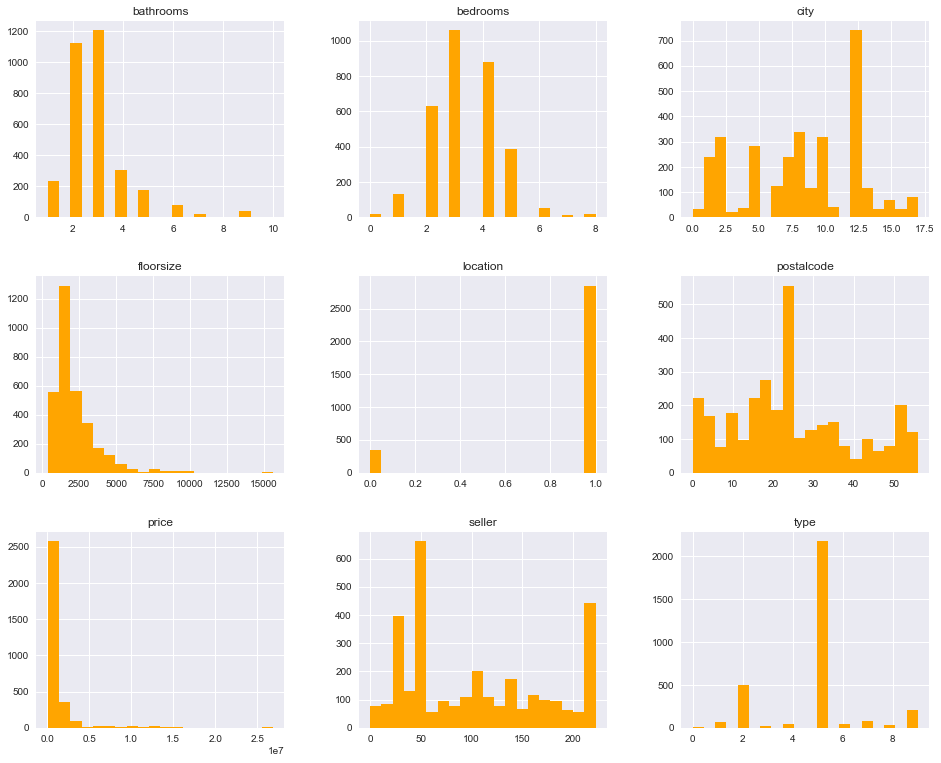

In [35]:
df.hist(figsize = (16, 13), bins = 20,color="orange");

In [36]:
def check_column(df, col_name, n_unique=10):
    """Displays info on null values, unique 
    values and displays .describe()
    
    Arg:
        kc_df(df): contains the columns
        col_name(str): name of the df column to show
        n_unique(int): number of unique values top show.
    Return:
        fig, ax(matplotlib Figure and Axes)
    """

    num_nulls = df[col_name].isna().sum()
    print(f'Null Values Present={num_nulls}')
    
    print('Describe:')
    display(df[col_name].describe())
    
    
    f = 'price~'+ col_name
    model = ols(formula=f, data=df).fit()
    display(model.summary())
    
    fig, axes = plt.subplots(ncols=2, nrows=1,figsize=(10,6));
    sns.distplot(df[col_name],hist=False,color="orange",kde_kws={"shade": True}, ax=axes[0])
    
    sns.regplot(x=col_name, y='price', data=df, ax=axes[1], color='orange')
    plt.tight_layout();
    
    return model

Null Values Present=0
Describe:


count    3190.000000
mean        3.316301
std         1.206215
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         8.000000
Name: bedrooms, dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     572.4
Date:                Fri, 16 Oct 2020   Prob (F-statistic):          1.74e-116
Time:                        07:48:31   Log-Likelihood:                -51134.
No. Observations:                3190   AIC:                         1.023e+05
Df Residuals:                    3188   BIC:                         1.023e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.212e+06   1.15e+05    -10.557      0.000   -1.44e+06   -9.87e+05
bedrooms    7.782e+05   3.25e+04     23.925      0.000    7.14e+05    8.42e+05
==============================================================================
Omnibus:                     3454.196   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           272535.399
Skew:                           5.454   Prob(JB):                         0.00
Kurtosis:                      46.948   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

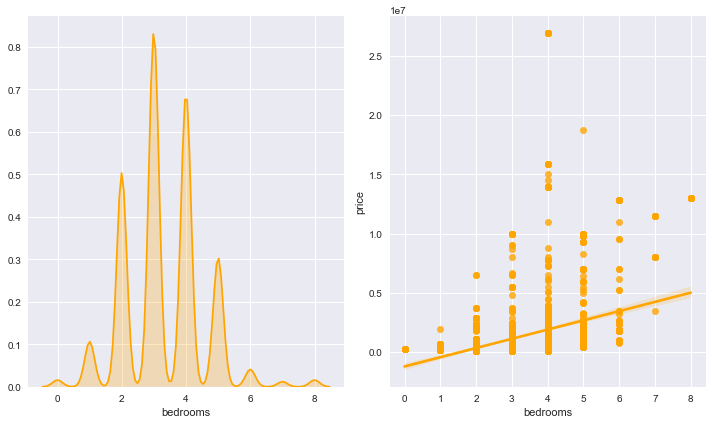

In [37]:
model = check_column(df,'bedrooms')

We can check each model using the function check_columns this allows us to quickly view the relationship between the column and the independent variable, price. It is a fast way to check for outliers and distribution too.

In [38]:
def multiplot(corr):
    fig, ax = plt.subplots(figsize =(12,12))
    mask = np.zeros_like(np.abs(df.corr().round(3)), dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True 
    sns.heatmap(np.abs(df.corr().round(3)), mask=mask, annot = True, cmap ='Oranges', ax=ax)
    
    return fig, ax 

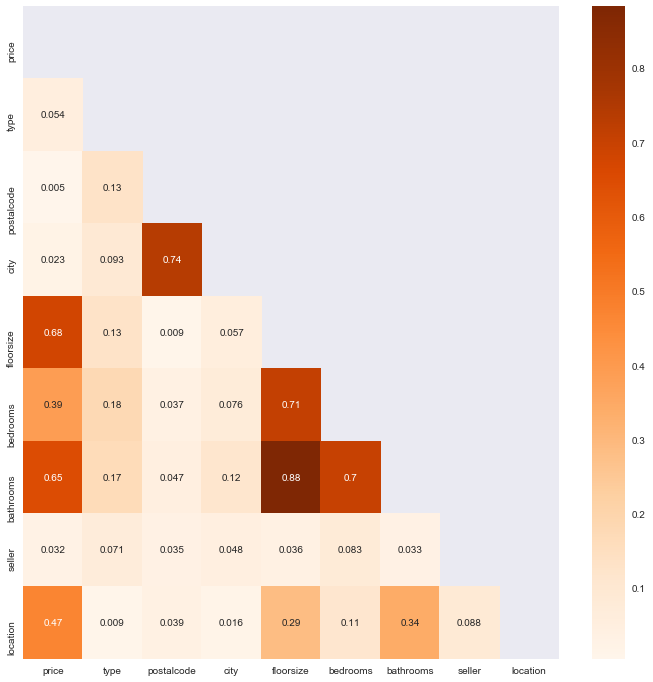

In [39]:
multiplot(np.abs(df.corr()));

The plot above shows the correlation between each column in a matrix format. Comparing every column with the percentage of correlation displayed. The correlation is then color coded with an orange color gradient displaying darker shades with larger percentages. This way we are able to spot high correlated/overlapping columns efficiently. As we can see floorsize and bathrooms have the highest percentage of 88% but due to the understanding of the two columns we have decided to keep both columns for our model.

In [40]:
def find_outliers(col):
    """Use scipy to calcualte absoliute Z-scores 
    and return boolean series where True indicates it is an outlier
    Args:
        col (Series): a series/column from your DataFrame
    Returns:
        idx_outliers (Series): series of  True/False for each row in col
    Ex:
    >> idx_outs = find_outliers(df['bedrooms'])
    >> df_clean = df.loc[idx_outs==False]"""
    from scipy import stats
    z = np.abs(stats.zscore(col))
    idx_outliers = np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=col.index)


The find_outliers function helps indicate the outiers within the specified column and drops the necessary rows which contain variables outside the temporary z-score guidelines (>3 and <-3). The find_outliers function was not used if the called column did not improve the model.

In [45]:
print(df.shape)
idx_outs = find_outliers(df['location'])
df = df.loc[idx_outs==False]
print(df.shape)
#removing outliers from called column.

(3047, 9)
(2797, 9)


In [42]:
print(df.shape)
idx_outs = find_outliers(df['price'])
df = df.loc[idx_outs==False]
print(df.shape)
#removing outliers from called column.

(3190, 9)
(3097, 9)


In [43]:
print(df.shape)
idx_outs = find_outliers(df['bathrooms'])
df = df.loc[idx_outs==False]
print(df.shape)

(3097, 9)
(3074, 9)


In [44]:
print(df.shape)
idx_outs = find_outliers(df['floorsize'])
df = df.loc[idx_outs==False]
print(df.shape)

(3074, 9)
(3047, 9)


In [46]:
bins = [0,76900, 974267,8250000]
labels = ['low price', 'average price', 'high price']
df['price point'] = pd.cut(df['price'], bins=bins, labels=labels)
#create price point column 

Below are a couple visualizations to see our data in a different way using bar graphs. We are able to compare the three price points of the property prices compared to different dependent variables.

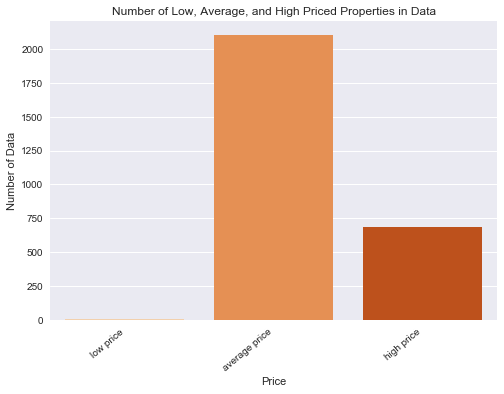

In [47]:
y= df["price point"].value_counts()
ax = sns.barplot(y.index, y.values, palette="Oranges")
ax.set_title('Number of Low, Average, and High Priced Properties in Data')
ax.set(xlabel='Price', ylabel='Number of Data')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show();
#unbalanced data

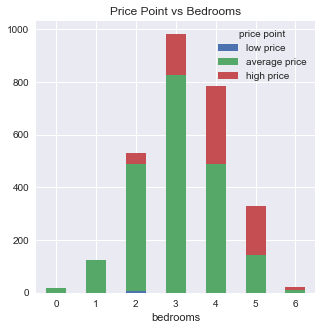

In [48]:
df.groupby(['bedrooms', 'price point']).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5),
                                                              rot=0, title = 'Price Point vs Bedrooms');

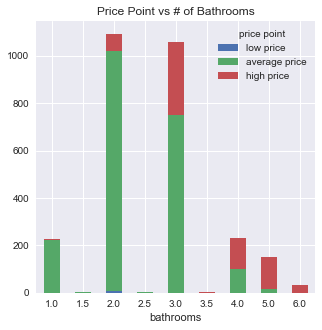

In [49]:
df.groupby(['bathrooms', "price point"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5),
                                                              rot=0, title = 'Price Point vs # of Bathrooms');

# Linear Regression Model

In [50]:
formula = 'price~ bedrooms+bathrooms+floorsize+C(type)+C(city)+C(postalcode)'

In [51]:
model = smf.ols(formula=formula,data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     165.6
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        07:54:19   Log-Likelihood:                -39672.
No. Observations:                2797   AIC:                         7.948e+04
Df Residuals:                    2729   BIC:                         7.988e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.296e+04   1.31e+05      0.175      0.861   -2.34e+05     2.8e+05
C(type)[T.1]         7.071e+05   1.47e+05      4.799      0.000    4.18e+05    9.96e+05
C(type)[T.2]         4.876e+05   1.41e+05      3.465      0.001    2.12e+05    7.64e+05
C(type)[T.3]         5.846e+05   1.61e+05      3.629      0.000    2.69e+05       9e+05
C(type)[T.4]         4.885e+05   1.48e+05      3.302      0.001    1.98e+05    7.79e+05
C(type)[T.5]         6.434e+05   1.37e+05      4.681      0.000    3.74e+05    9.13e+05
C(type)[T.6]         5.715e+05   1.48e+05      3.864      0.000    2.81e+05    8.61e+05
C(type)[T.7]         4.131e+05   1.44e+05      2.872      0.004    1.31e+05    6.95e+05
C(type)[T.8]         3.941e+05   1.53e+05      2.580      0.010    9.46e+04    6.94e+05
C(type)[T.9]         3.284e+05   1.42e+05      2.312      0.021    4.98e+04    6.07e+05
C(city)[T.1]        -2.467e+05   3.59e+04     -6.869      0.000   -3.17e+05   -1.76e+05
C(city)[T.2]        -4.408e+05   3.96e+04    -11.122      0.000   -5.19e+05   -3.63e+05
C(city)[T.3]         9.502e+05   3.95e+04     24.041      0.000    8.73e+05    1.03e+06
C(city)[T.4]         1.486e+06   3.35e+04     44.348      0.000    1.42e+06    1.55e+06
C(city)[T.5]        -3.923e+05   1.95e+04    -20.078      0.000   -4.31e+05   -3.54e+05
C(city)[T.6]         1.157e+05   1.89e+04      6.130      0.000    7.87e+04    1.53e+05
C(city)[T.7]        -4.296e+05   2.72e+04    -15.768      0.000   -4.83e+05   -3.76e+05
C(city)[T.9]        -2.975e+05   2.41e+04    -12.329      0.000   -3.45e+05    -2.5e+05
C(city)[T.10]       -4.109e+05   2.18e+04    -18.828      0.000   -4.54e+05   -3.68e+05
C(city)[T.11]       -1.748e+05   3.21e+04     -5.442      0.000   -2.38e+05   -1.12e+05
C(city)[T.12]        -2.99e+05   2.09e+04    -14.336      0.000    -3.4e+05   -2.58e+05
C(city)[T.13]       -3.129e+05   2.36e+04    -13.232      0.000   -3.59e+05   -2.67e+05
C(city)[T.14]       -1.806e+05   3.27e+04     -5.529      0.000   -2.45e+05   -1.17e+05
C(city)[T.15]          7.5e+05   2.41e+04     31.060      0.000    7.03e+05    7.97e+05
C(city)[T.16]       -2.853e+05   7.01e+04     -4.071      0.000   -4.23e+05   -1.48e+05
C(city)[T.17]       -4.188e+05   3.59e+04    -11.661      0.000   -4.89e+05   -3.48e+05
C(postalcode)[T.1]  -8.833e+04   5.85e+04     -1.509      0.131   -2.03e+05    2.65e+04
C(postalcode)[T.2]  -1.713e+05   5.94e+04     -2.886      0.004   -2.88e+05   -5.49e+04
C(postalcode)[T.3]  -1.146e+05   1.32e+05     -0.871      0.384   -3.73e+05    1.43e+05
C(postalcode)[T.4]  -1.471e+05   5.55e+04     -2.648      0.008   -2.56e+05   -3.81e+04
C(postalcode)[T.5]  -1.348e+05   3.39e+04     -3.972      0.000   -2.01e+05   -6.82e+04
C(postalcode)[T.6]  -1.627e+05   3.81e+04     -4.264      0.000   -2.37e+05   -8.79e+04
C(p

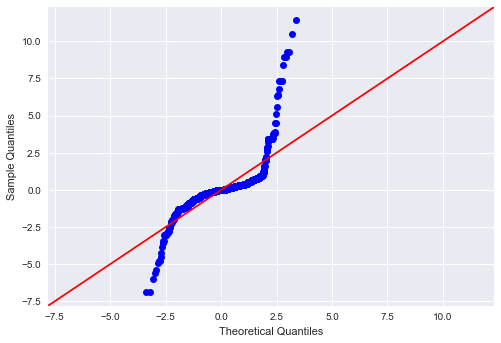

In [52]:
resids = model.resid
sm.graphics.qqplot(resids, stats.norm, line='45', fit=True);

Model 1 created an R-squared value of .80 indicating a high positive correlation of the listed independent variables with price. There are a couple high p-values within the postalcode cateogory but it has more of a positive input to the model than negative. Therefore, we left the postalcode column in the model formula. As we see there are still quite a few outliers within our data from our qqplot shown above. 

# Random Forest Model

In [53]:
%conda update scikit-learn
!pip install imblearn
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
 
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

Solving environment: done

## Package Plan ##

  environment location: /Users/susannahan/anaconda3

  added / updated specs:
    - scikit-learn


The following NEW packages will be INSTALLED:

  argon2-cffi        pkgs/main/osx-64::argon2-cffi-20.1.0-py37haf1e3a3_1
  async_generator    pkgs/main/osx-64::async_generator-1.10-py37h28b3542_0
  brotlipy           pkgs/main/osx-64::brotlipy-0.7.0-py37haf1e3a3_1000
  importlib-metadata pkgs/main/noarch::importlib-metadata-2.0.0-py_1
  iniconfig          pkgs/main/noarch::iniconfig-1.1.1-py_0
  jupyterlab_pygmen~ pkgs/main/noarch::jupyterlab_pygments-0.1.2-py_0
  lcms2              pkgs/main/osx-64::lcms2-2.11-h92f6f08_0
  libllvm10          pkgs/main/osx-64::libllvm10-10.0.1-h76017ad_5
  libllvm9           pkgs/main/osx-64::libllvm9-9.0.1-h21ff451_1
  nbclient           pkgs/main/noarch::nbclient-0.5.1-py_0
  nest-asyncio       pkgs/main/noarch::nest-asyncio-1.4.1-py_0
  regex              pkgs/main/osx-64::regex-2020.10.15-py37haf1e3a3_0
  

Preparing transaction: done
Verifying transaction: done
Executing transaction: done
ERROR conda.core.link:_execute(700): An error occurred while uninstalling package 'defaults/osx-64::statsmodels-0.11.0-py37h1de35cc_0'.
Rolling back transaction: done

[Errno 13] Permission denied: '/Users/susannahan/anaconda3/lib/python3.7/site-packages/statsmodels-0.11.0.dist-info/INSTALLER' -> '/Users/susannahan/anaconda3/lib/python3.7/site-packages/statsmodels-0.11.0.dist-info/INSTALLER.c~'
()


Note: you may need to restart the kernel to use updated packages.


In [54]:
def plot_importance(tree_clf, top_n=10,figsize=(5,5)):
    """ Arguments needed to plot an importance bar graph is the model, number of features to display, and 
    desired figsize for the graph. 
    
    This function displays a bar graph of top 10 important features from most to least important."""
    
    #calculates which feature was used the most in the model.
    df_importance = pd.Series(tree_clf.feature_importances_,index=X_train.columns)
    #sorts 10 important features data in ascending order
    df_importance.sort_values(ascending=True).tail(top_n).plot(
        kind='barh', cmap = 'jet', figsize=figsize)
    
    #graph labels
    plt.xlabel('Features Importance')
    plt.ylabel('Features')
    plt.title('Important Features Measured')
    plt.legend()
    plt.show() 

    return df_importance

In [56]:
def evaluate_model(y_test,y_pred,X_test,clf=None,
                  scoring=metrics.recall_score,verbose=False,
                   figsize = (10,4),
                   display_labels=('Low Price','Average Price','High Price')):
    """
    Arguments needed to evaluate the model are y_test, y_pred, x_test, 
    the model, and display labels.
    
    Evaluate_model prints out the precision, recall, and f1-score score. As well as accuracy, 
    macro average, and weighted average.
    
    Below, a Confusion Matrix visual shows the percentage of how accurate the model fit both predicted and actual
    values. 
    
    """
    ## Classification Report / Scores 
    
    print(metrics.classification_report(y_test,y_pred))
    # plots Confusion Matrix
    metrics.plot_confusion_matrix(clf,X_test,y_test,cmap="Blues",
                                  normalize='true', 
                                  display_labels = display_labels)
    plt.title('Confusion Matrix')
    plt.show()

    try: 
        df_important = plot_importance(clf)
    except:
        df_important = None
        

        

In [57]:
## a timer to record how long a process takes
class Timer():
 
    ## imports local time and formats displayed time
    def __init__(self,format_="%m/%d/%y - %I:%M %p"):
        import tzlocal
        self.tz = tzlocal.get_localzone()
        self.fmt = format_
        self.created_at = self.get_time()
        
    ## returns current time.
    def get_time(self):
        import datetime as dt
        return dt.datetime.now(self.tz)

    ## displays when time has started.
    def start(self):
        time = self.get_time()
        self.start = time
        print(f"[i] Timer started at{self.start.strftime(self.fmt)}")
        

    ## displays when time has stopped.
    def stop(self):
        time = self.get_time()
        self.end = time
        print(f"[i] Timer ended at {self.end.strftime(self.fmt)}")
        print(f"- Total time = {self.end-self.start}")
timer = Timer()
print(timer.created_at)

2020-10-16 07:57:17.698590-05:00


In [58]:
drop_col = ['price point','price']
y = df['price point']
X = df.drop(drop_col,axis=1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size = .25, random_state = 123)

In [60]:
y_train.value_counts(normalize=True)

average price    0.751550
high price       0.245589
low price        0.002861
Name: price point, dtype: float64

In [61]:
y_test.value_counts(normalize=True)
#percentage of testing data distribution

average price    0.751429
high price       0.245714
low price        0.002857
Name: price point, dtype: float64

In [62]:
smote = SMOTE()
X_train, y_train = smote.fit_sample(X_train, y_train)

In [63]:
pd.Series(y_train).value_counts(normalize=True)
#normalize data distribution

high price       0.333333
average price    0.333333
low price        0.333333
Name: price point, dtype: float64

In [64]:
tree = RandomForestClassifier(class_weight='balanced')
tree.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [65]:
rf_random = RandomForestClassifier()
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': ['gini','entropy']}

In [66]:
# Random grid is used to search for best hyperparameters
# search across 100 different combinations, and use all available cores
timer = Timer()
timer.start()

rf_tree = RandomizedSearchCV(estimator = rf_random, 
                             param_distributions = random_grid, 
                             n_iter = 30,cv = 3, verbose=2, 
                             random_state=42, n_jobs = -1)
#Fitting 3 folds for each of 100 candidates, totalling 300 fits
# Fit the random search model
rf_tree.fit(X_train, y_train)
timer.stop()

[i] Timer started at10/16/20 - 07:57 AM
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.4min finished


[i] Timer ended at 10/16/20 - 07:59 AM
- Total time = 0:02:23.571434


In [67]:
display(rf_tree.best_params_)

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'criterion': 'gini',
 'bootstrap': False}

In [68]:
tree = rf_tree.best_estimator_
#tree with best params
y_hat_test = tree.predict(X_test)
#predictions

               precision    recall  f1-score   support

average price       1.00      1.00      1.00       526
   high price       0.99      0.99      0.99       172
    low price       1.00      1.00      1.00         2

     accuracy                           1.00       700
    macro avg       1.00      1.00      1.00       700
 weighted avg       1.00      1.00      1.00       700



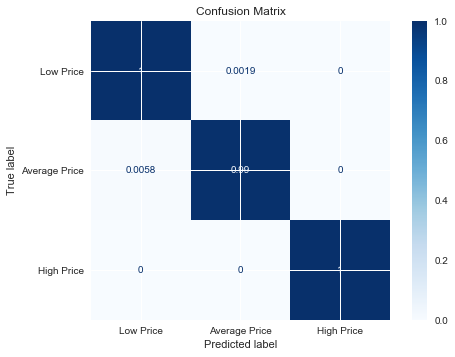

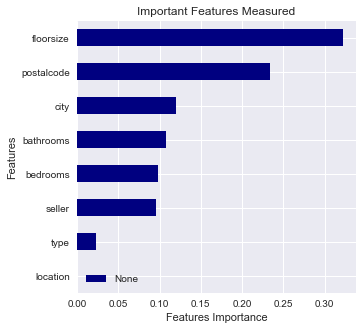

In [69]:
evaluate_model(y_test, y_hat_test, X_test, tree)

In [70]:
display(tree.score(X_train, y_train))
display(tree.score(X_test, y_test))

1.0

0.9971428571428571

In [71]:
df_import = pd.Series(tree.feature_importances_, index = X_train.columns,name='Importance')
display(df_import.sort_values(ascending=True).tail())

bedrooms      0.098169
bathrooms     0.108416
city          0.119986
postalcode    0.233462
floorsize     0.321797
Name: Importance, dtype: float64

# RESULTS and CONCLUSION

The r squared value in our linear regression model increased as we took away the location and seller variables, resulting in a r squared value of 0.80. Which can be interpreted as a 80% correlation. 

The random forest model performed well with the top three correlated features being floorsize, postalcode, and city. The model was able to predict the price point of a property based on the features 99% accurately. 

When comparing the two models the Random forest was able to provide more in depth and accurate information in what the market looks like in San Diego. Although there were not many independent variables to come to a groundbreaking insight in the real estate market. The potential of these models are exciting to see as we continue to collect more data about the properties being listed. For future work we will be scraping more facts and features of each property to even further more discover the different variables affecting the market.

# INSIGHTS and RECOMMENDATIONS

1. It is important to know that the floorsize and location of the property will have the biggest impact on the price of the home. We are also interested in calculating the price/sqft to compare the low, average, and high cost properties.

2. For homebuyers: The agent(s) or company showing the property has an impact on the the price range of the homes because they only try to sell certain types of homes at a certain price point.

3. The specific postalcode area will have more affect on the price of the property than if the property is located in the city or suburb.